<a href="https://colab.research.google.com/github/IsaVillarejo/repositorio-tfm/blob/main/TFM_CLASSWEIGHT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#CARGA DATOS INICIAL

In [ ]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.5
    Uninstalling kaggle-1.7.4.5:
      Successfully uninstalled kaggle-1.7.4.5


In [ ]:
# Seleccionar el API Token personal previamente descargado de kaggle (fichero kaggle.json)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"isabelvi","key":"572b0ec345751c342a13052630fae2ae"}'}

In [ ]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Aceptamos las reglas de la competición de kaggle y descargamos el dataset correspondiente

!kaggle competitions download -c ieee-fraud-detection


 97% 114M/118M [00:00<00:00, 1.19GB/s]
100% 118M/118M [00:00<00:00, 1.16GB/s]


In [ ]:
# Creemos un directorio para descomprimir los datos
!mkdir /content/ieee-fraud-detection.zip

# Descomprimimos los datos y los dejamos listos para trabajar
!unzip ieee-fraud-detection.zip -d my_dataset

mkdir: cannot create directory ‘/content/ieee-fraud-detection.zip’: File exists
Archive:  ieee-fraud-detection.zip
  inflating: my_dataset/sample_submission.csv  
  inflating: my_dataset/test_identity.csv  
  inflating: my_dataset/test_transaction.csv  
  inflating: my_dataset/train_identity.csv  
  inflating: my_dataset/train_transaction.csv  


In [ ]:
train_trans = pd.read_csv('/content/my_dataset/train_transaction.csv')

In [ ]:
test_trans = pd.read_csv('/content/my_dataset/test_transaction.csv')

In [ ]:
train_id = pd.read_csv('/content/my_dataset/train_identity.csv')

In [ ]:
test_id = pd.read_csv('/content/my_dataset/test_identity.csv')

Número de filas y columnas:

In [ ]:
train_trans.shape
#(590540, 394)

(590540, 394)

In [ ]:
test_trans.shape

(506691, 393)

Tenemos 393 caracteristicas (mas la etiqueta, fraude o no). En el entrenamiento se tienen 590540 instancias y 506691 en el test.

In [ ]:
train_id.shape

(144233, 41)

In [ ]:
test_id.shape

(141907, 41)

In [ ]:
train_trans.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

In [ ]:
train_id.head()

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                     DeviceInfo  
0     F     T      T      mobile  SAMSUNG SM-G892A Build/NRD90M  
1     F     F      T      mobile                     iOS Device  
2     F     T      T     desktop                        Windows  
3     F     T      T     desktop                            NaN  
4     F     T      T     desktop                          MacOS  

[5 rows x 41 columns]

#DESCRIPTIVO

El objetivo es predecir la probabilidad de que una transacción en línea sea fraudulenta.

Los datos se dividen en dos archivos identity y transaction, que se unen mediante TransactionID. No todas las transacciones tienen la información de identidad correspondiente.

Tabla de transacciones: contiene transferencias de dinero y también otros regalos de bienes y servicios, como reservar un boleto para otras personas, etc.

- TransactionDT: timedelta de una fecha y hora de referencia dada (no una marca de tiempo real).


- TransactionAMT: importe del pago de la transacción en USD.

- ProductCD: código del producto, el producto para cada transacción.(variable categórica)

- card1 - card6: información de la tarjeta de pago, como tipo de tarjeta, categoría de tarjeta, banco emisor, país, etc. (variables categóricas)

- addr1 y addr2: direcciones
(ambas direcciones son para el comprador
addr1 como región de facturación
addr2 como país de facturación) (variables categóricas)

- dist: distancia
“distancias entre (no limitadas) dirección de facturación, dirección postal, código postal, dirección IP, área telefónica, etc.”

P_ y (R__) emaildomain: dominio de correo electrónico del comprador y del destinatario
“ciertas transacciones no necesitan destinatario, por lo que R_emaildomain es nulo.” (variables categoricas)

C1-C14: recuento, como cuántas direcciones se encuentran asociadas con la tarjeta de pago, etc. El significado real está enmascarado.

D1-D15: timedelta, como días entre transacciones anteriores, etc.

M1-M9: coincidencia, como nombres en la tarjeta y dirección, etc. (variables categóricas)

Vxxx: Vesta diseñó funciones avanzadas, que incluyen clasificación, conteo y otras relaciones entre entidades.
"Por ejemplo, cuántas veces apareció la tarjeta de pago asociada a una IP, correo electrónico o dirección en un intervalo de 24 horas, etc."




In [ ]:
#comprobar las variables no numericas
train_trans.select_dtypes(exclude=['number']).columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')

Tabla de identidad

Las variables de esta tabla son información de identidad: información de conexión de red (IP, ISP, proxy, etc.) y firma digital (UA/navegador/sistema operativo/versión, etc.) asociadas a las transacciones.
Estas variables son recopiladas por el sistema de protección contra fraudes de Vesta y sus socios de seguridad digital.
(Los nombres de los campos están enmascarados y no se proporcionará un diccionario por pares para proteger la privacidad y garantizar la conformidad contractual).

Características categóricas:
Tipo de dispositivo, Información del dispositivo,id_12 - id_38

In [ ]:
#comprobar las variables no numericas
train_id.select_dtypes(exclude=['number']).columns

Index(['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

## Union de las tablas

In [ ]:
#Unión por la columna "TransactionID", manteniendo todas las filas de train_trans y de test_trans
train = train_trans.merge(train_id, on='TransactionID', how='left')
test = test_trans.merge(test_id, on='TransactionID', how='left')


In [ ]:
train.shape

(590540, 434)

In [ ]:
test.shape

(506691, 433)

# Gráfico de variables

VARIABLE OBJETIVO

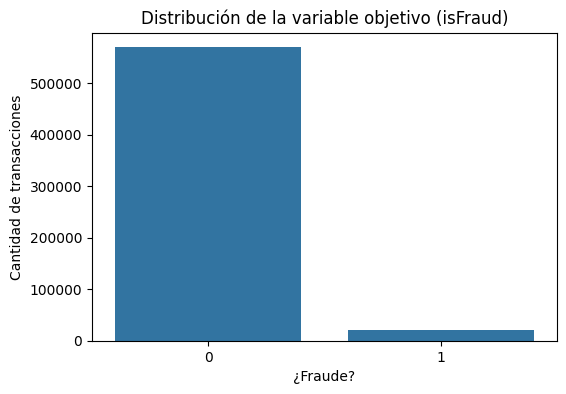

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=train)
plt.title('Distribución de la variable objetivo (isFraud)')
plt.xlabel('¿Fraude?')
plt.ylabel('Cantidad de transacciones')
plt.show()

Como era de esperar hay muchos menos casos de Fraud que de no Fraud. Veamos en concreto la proporción

In [ ]:
print(train['isFraud'].value_counts())

# Proporciones
print("\nProporciones:")
print(train['isFraud'].value_counts(normalize=True))

isFraud
0    569877
1     20663
Name: count, dtype: int64

Proporciones:
isFraud
0    0.96501
1    0.03499
Name: proportion, dtype: float64


Este desbalanceo tendrá que ser tratado mas adelante

CANTIDAD DE TRANSACCIONES (según si es Fraude o no)

- TRANSACTION AMT

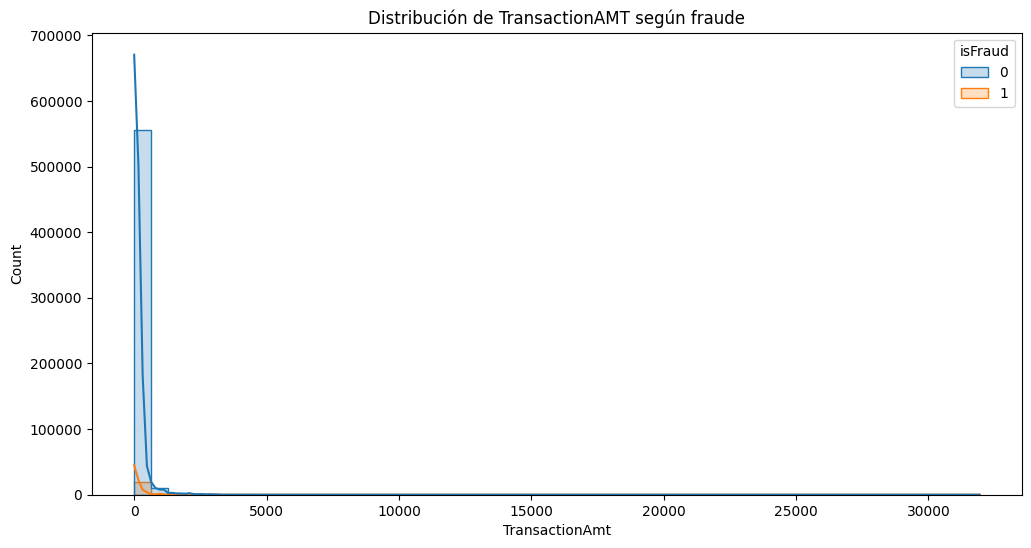

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(train, x='TransactionAmt', bins=50, kde=True, hue='isFraud', element='step')
plt.title('Distribución de TransactionAMT según fraude')
plt.show()


In [ ]:
train['TransactionAmt'].median()

68.769

Parece que hay outliers que dificultan la visualización, por ello se ha limitado el rango usando solo los valores por debajo del percentil 99



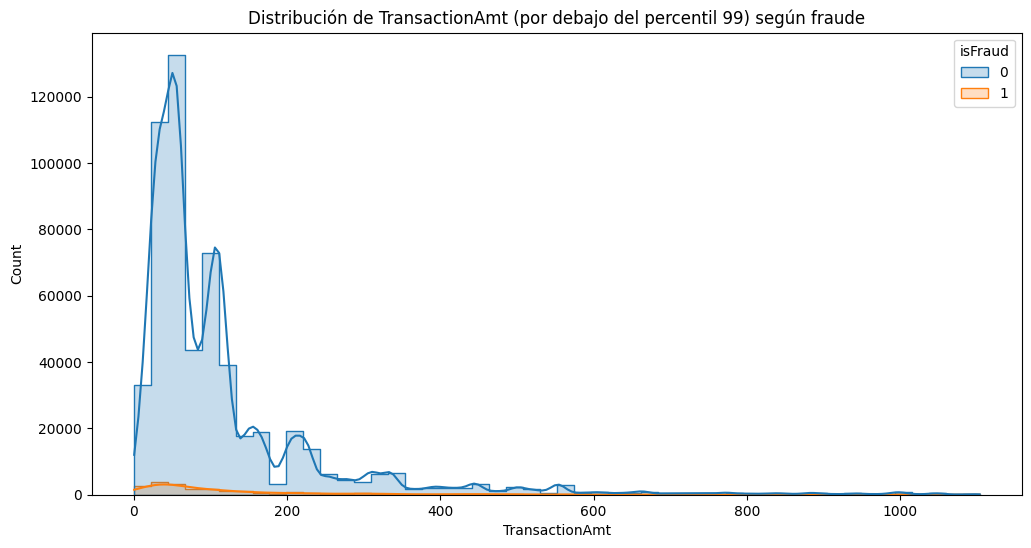

In [ ]:
p99 = train['TransactionAmt'].quantile(0.99)

plt.figure(figsize=(12,6))
sns.histplot(train[train['TransactionAmt'] < p99], x='TransactionAmt', bins=50, kde=True, hue='isFraud', element='step')
plt.title('Distribución de TransactionAmt (por debajo del percentil 99) según fraude')
plt.show()


DISTANCIAS (dist1):

Histograma o boxplot, para ver si hay diferencias entre fraude/no fraude.

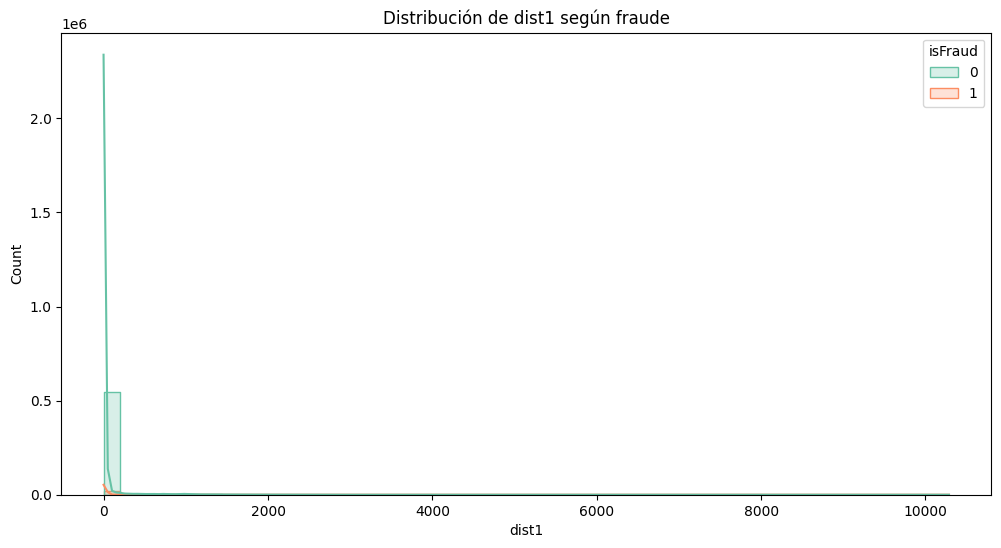

<ipython-input-16-bd1f5a992344>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='dist1', data=train, palette='Set2')


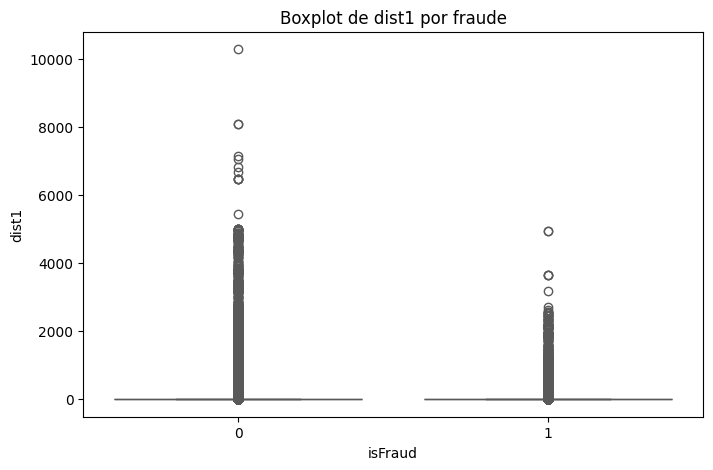

In [ ]:
# Histograma dist1
plt.figure(figsize=(12,6))
sns.histplot(data=train, x='dist1', bins=50, hue='isFraud', kde=True, element='step', palette='Set2')
plt.title('Distribución de dist1 según fraude')
plt.show()

# Boxplot dist1
plt.figure(figsize=(8,5))
sns.boxplot(x='isFraud', y='dist1', data=train, palette='Set2')
plt.title('Boxplot de dist1 por fraude')
plt.show()



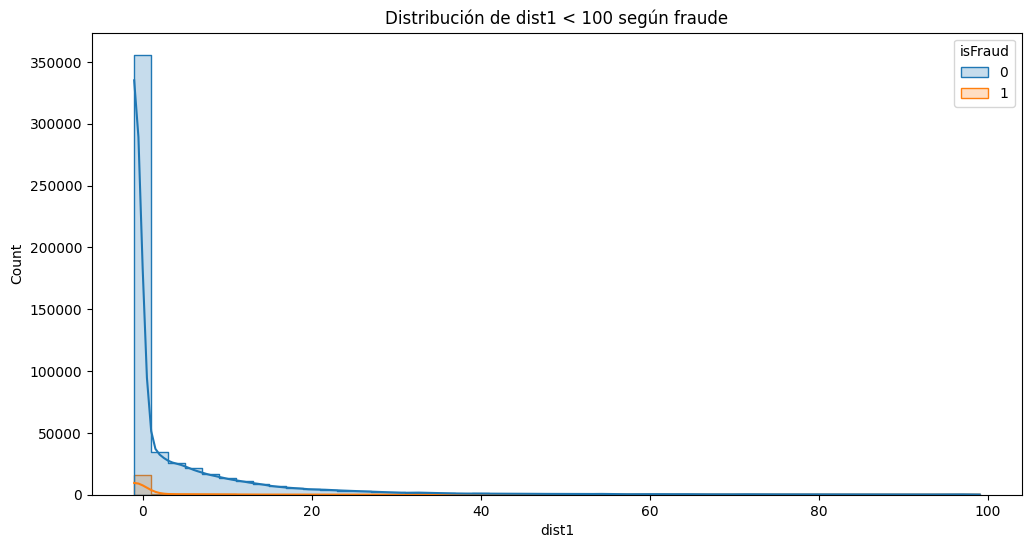

In [ ]:
#mas cerca
plt.figure(figsize=(12,6))
sns.histplot(train[train['dist1'] < 100], x='dist1', bins=50, kde=True, hue='isFraud', element='step')
plt.title('Distribución de dist1 < 100 según fraude')
plt.show()

**VARIABLES CATEGÓRICAS**

In [ ]:
train.select_dtypes(exclude=['number']).columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

Veamos cuantos valores únicos hay por cada variable categórica

In [ ]:
cat_cols = train.select_dtypes(exclude=['number']).columns

for col in cat_cols:
    print(f"{col}: {train[col].nunique()} categorías")


ProductCD: 5 categorías
card4: 4 categorías
card6: 4 categorías
P_emaildomain: 59 categorías
R_emaildomain: 60 categorías
M1: 2 categorías
M2: 2 categorías
M3: 2 categorías
M4: 3 categorías
M5: 2 categorías
M6: 2 categorías
M7: 2 categorías
M8: 2 categorías
M9: 2 categorías
id_12: 2 categorías
id_15: 3 categorías
id_16: 2 categorías
id_23: 3 categorías
id_27: 2 categorías
id_28: 2 categorías
id_29: 2 categorías
id_30: 75 categorías
id_31: 130 categorías
id_33: 260 categorías
id_34: 4 categorías
id_35: 2 categorías
id_36: 2 categorías
id_37: 2 categorías
id_38: 2 categorías
DeviceType: 2 categorías
DeviceInfo: 1786 categorías


Graficamos estas distinguiendo entre fraude y no fraude

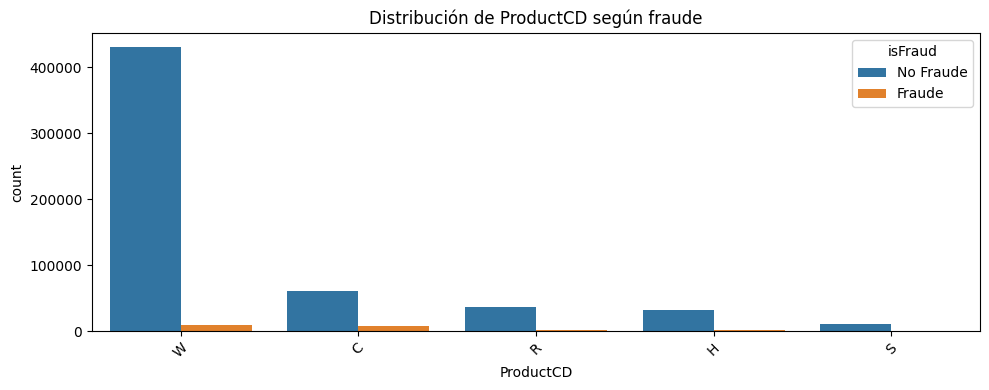

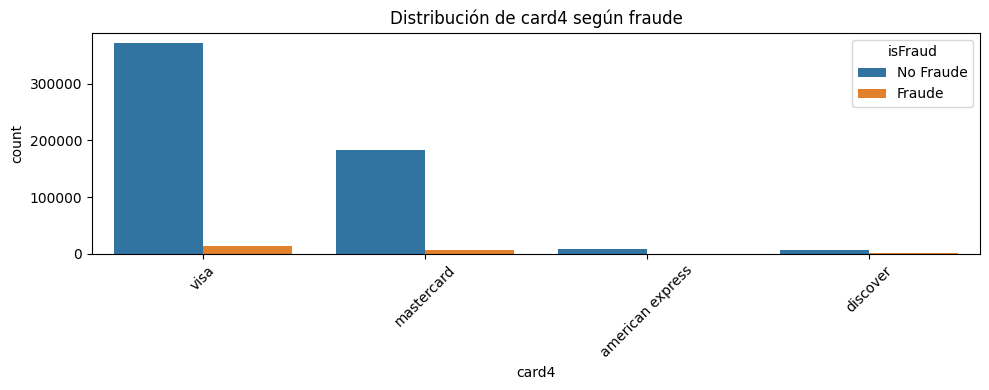

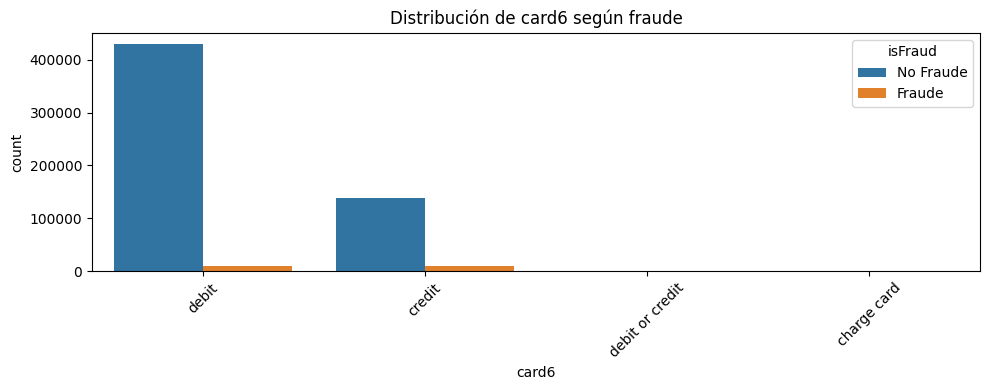

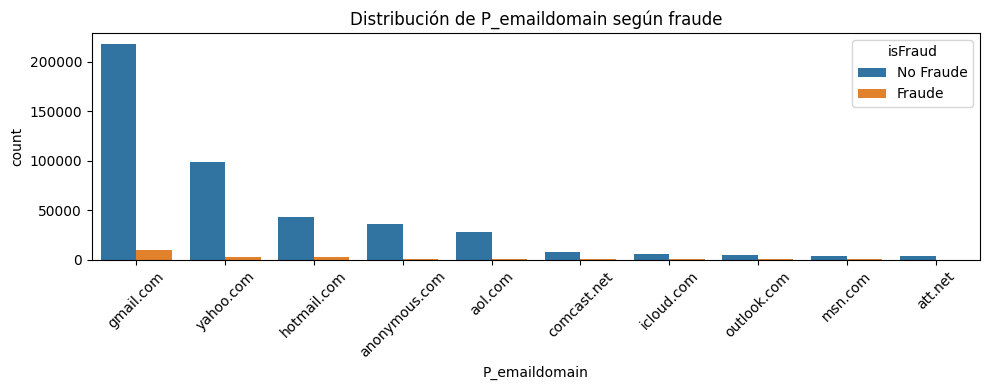

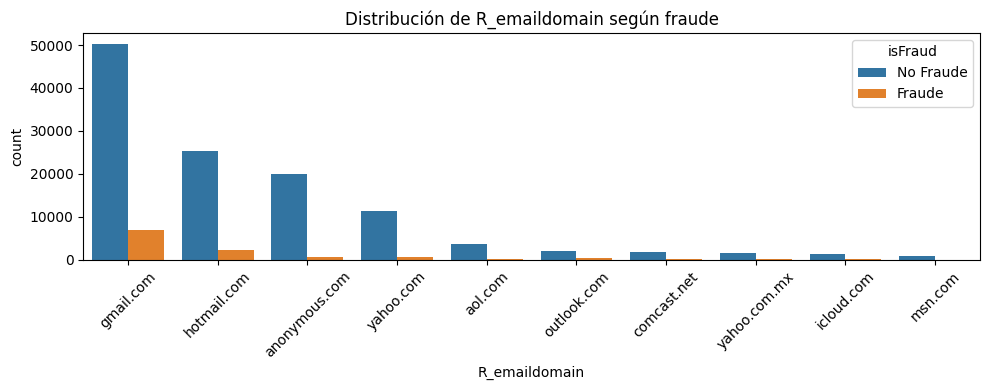

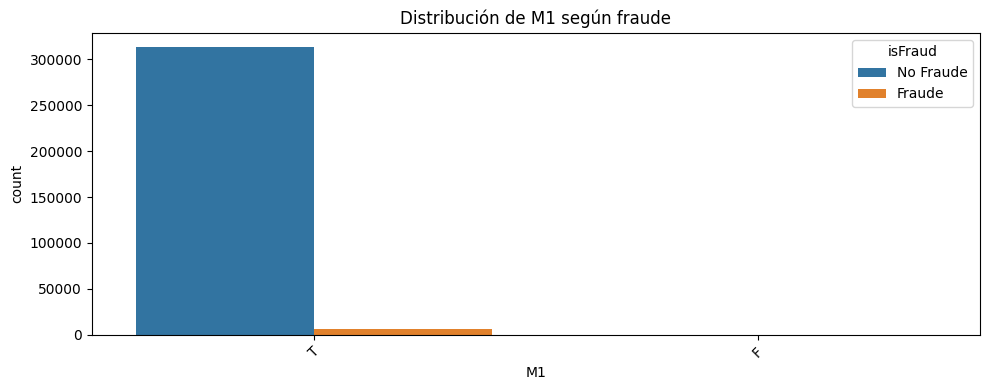

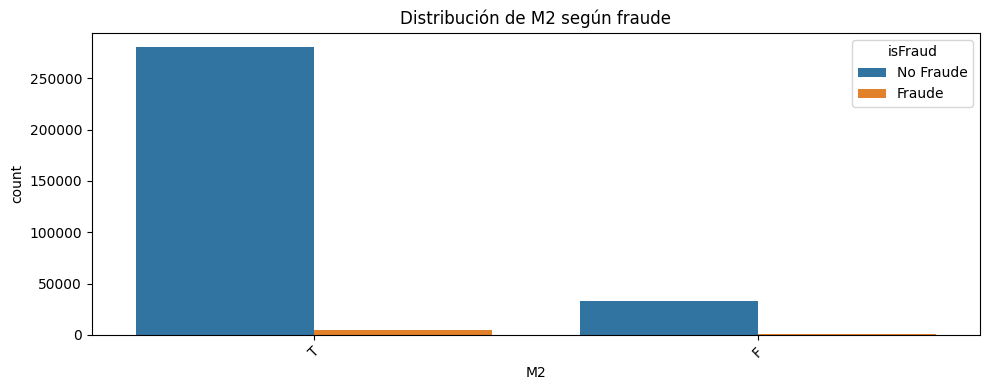

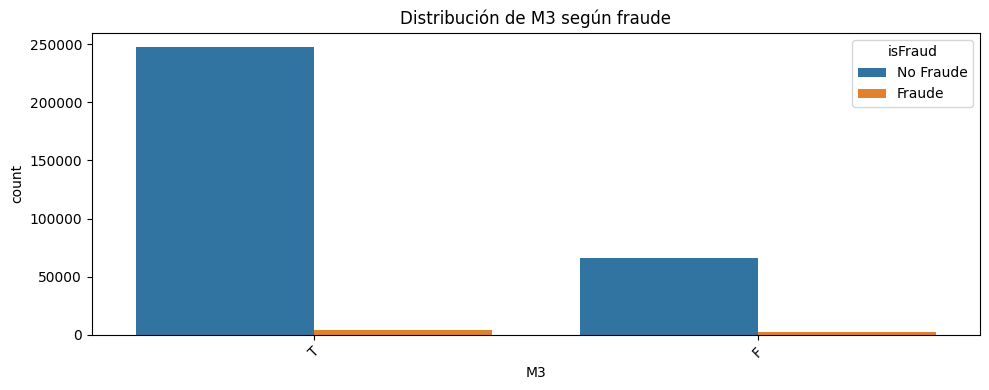

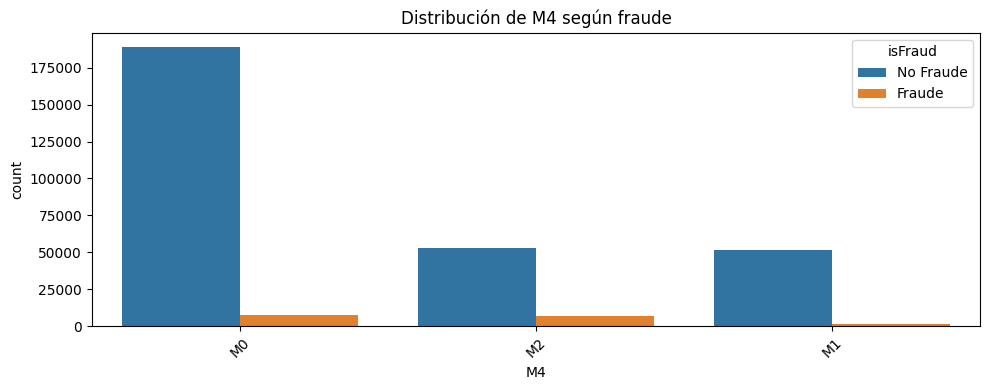

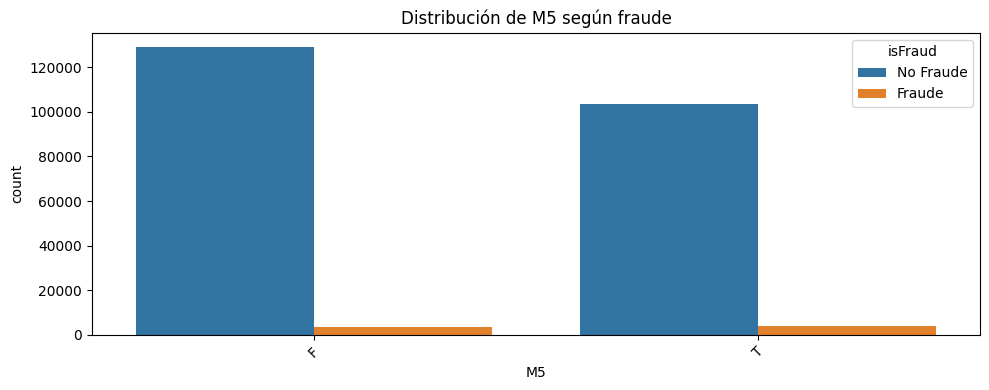

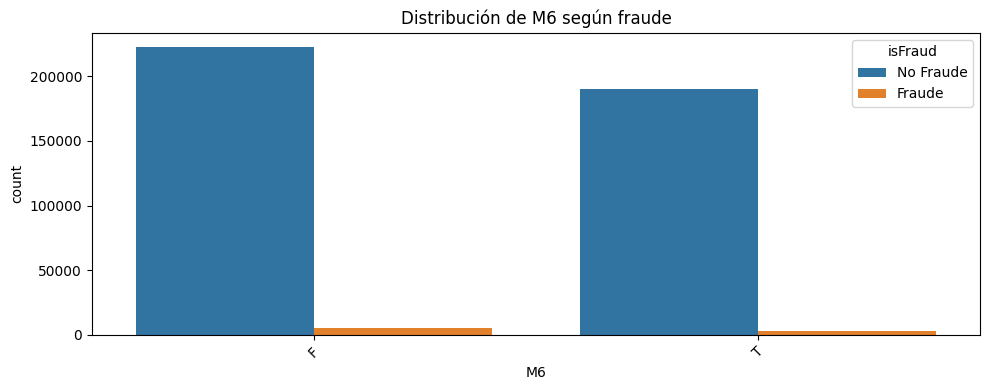

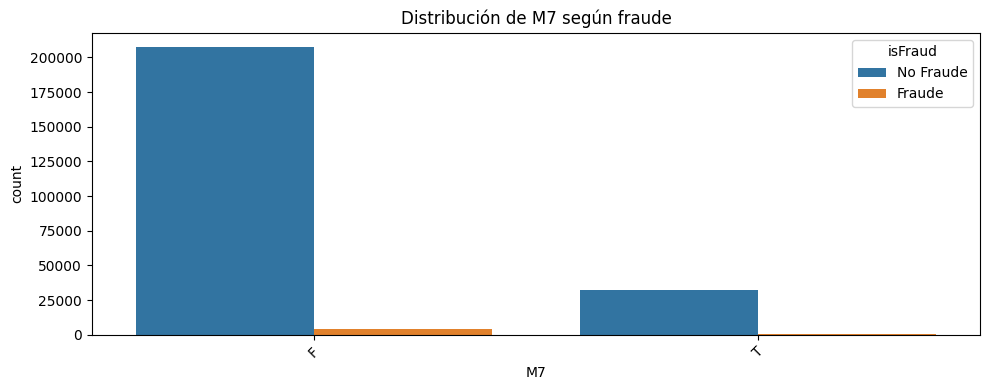

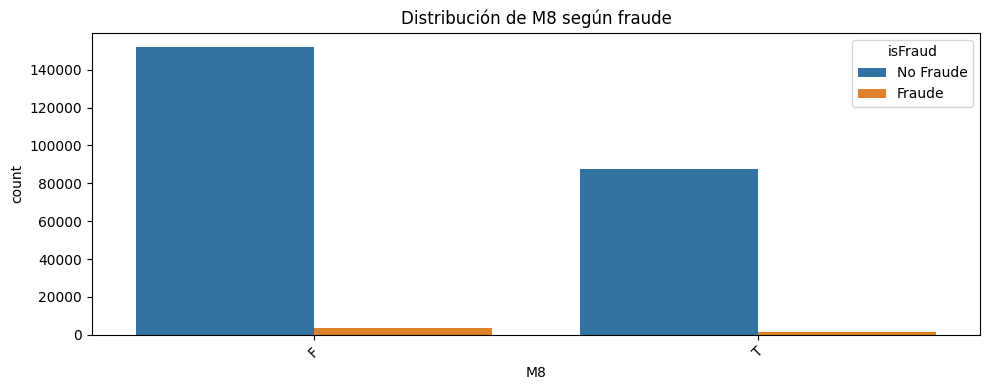

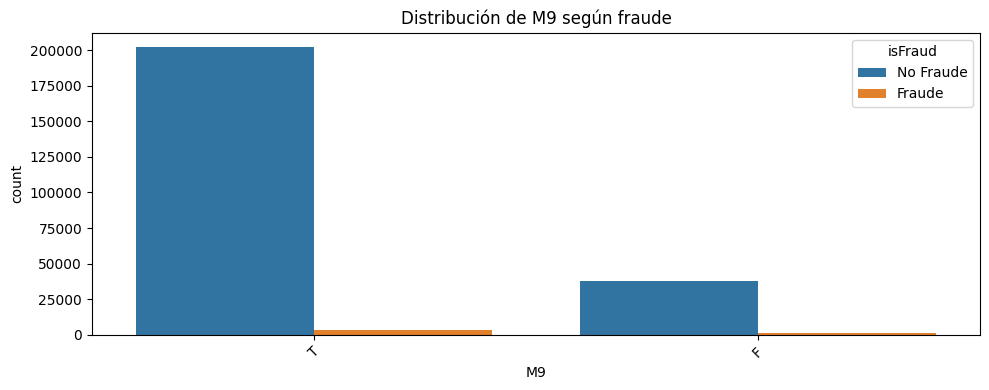

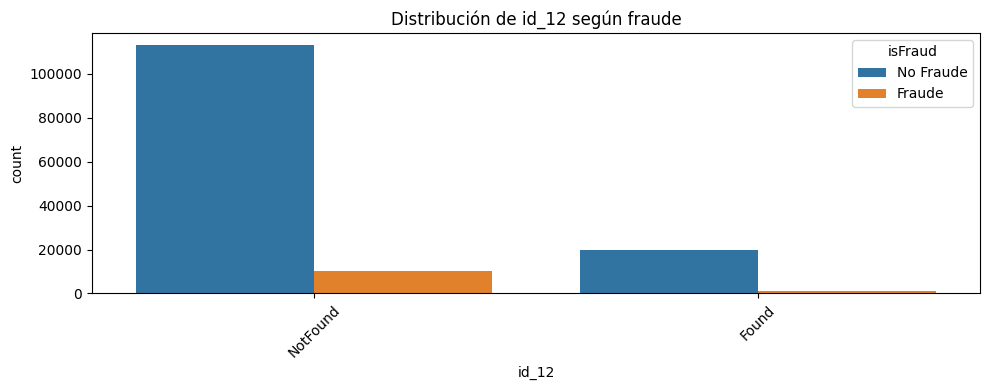

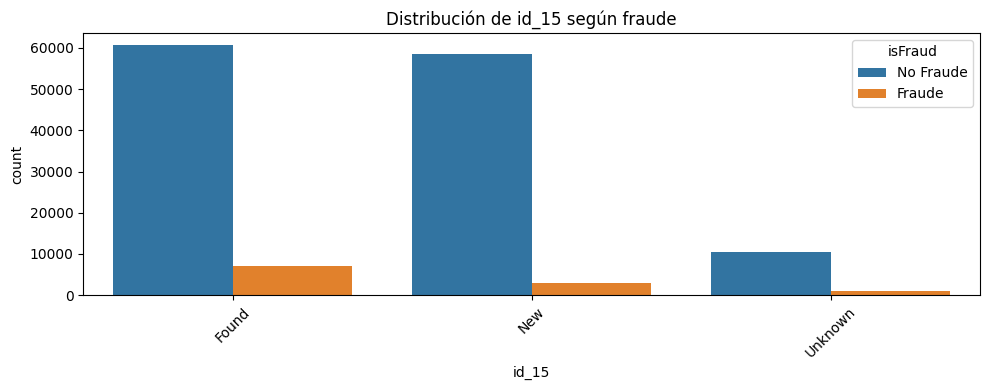

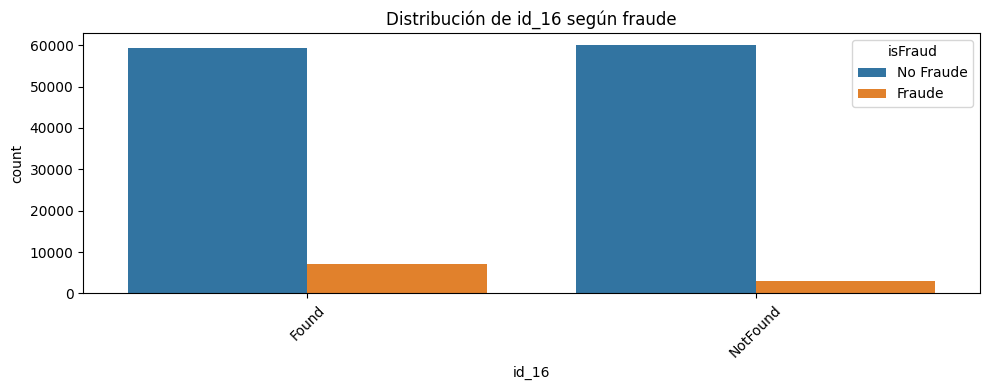

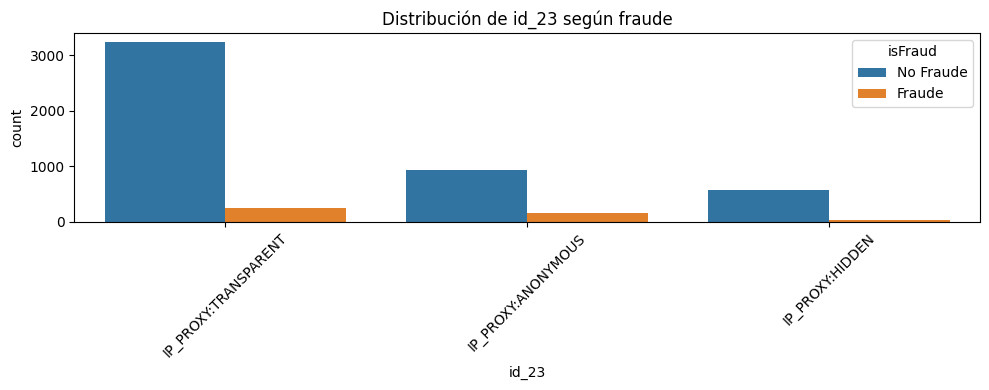

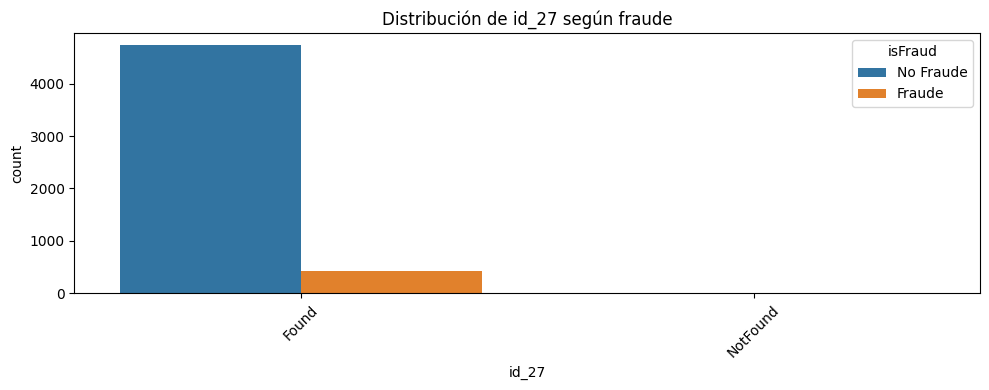

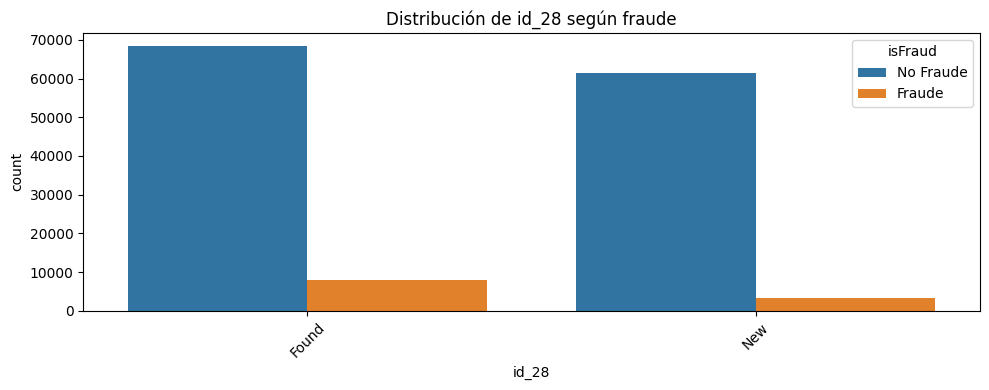

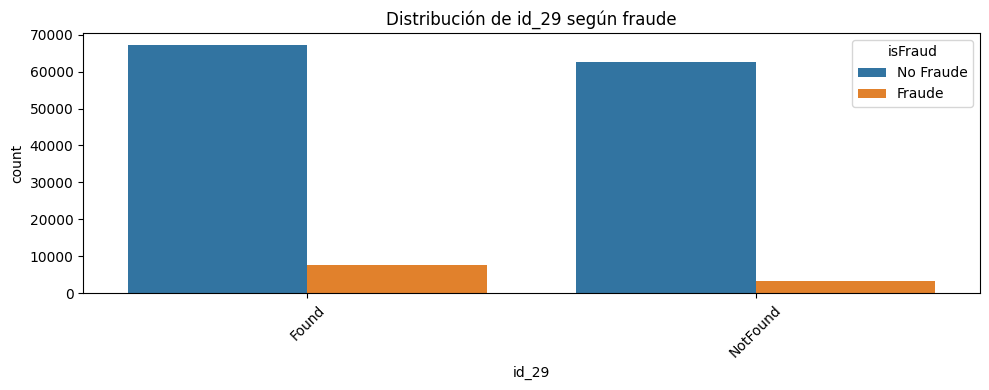

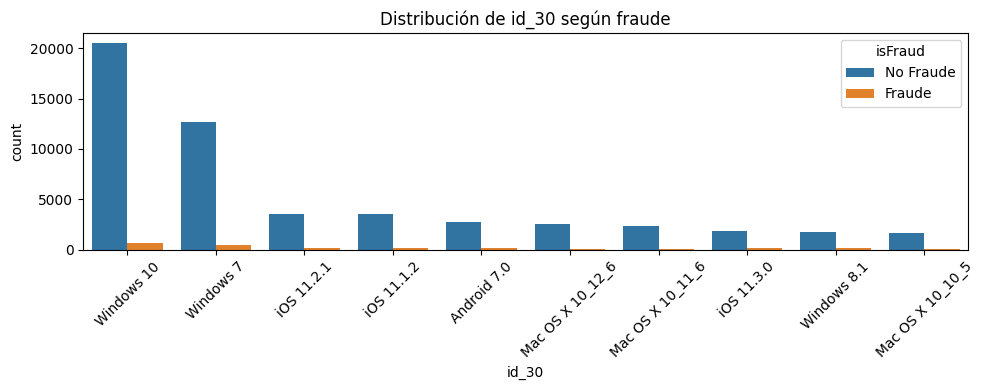

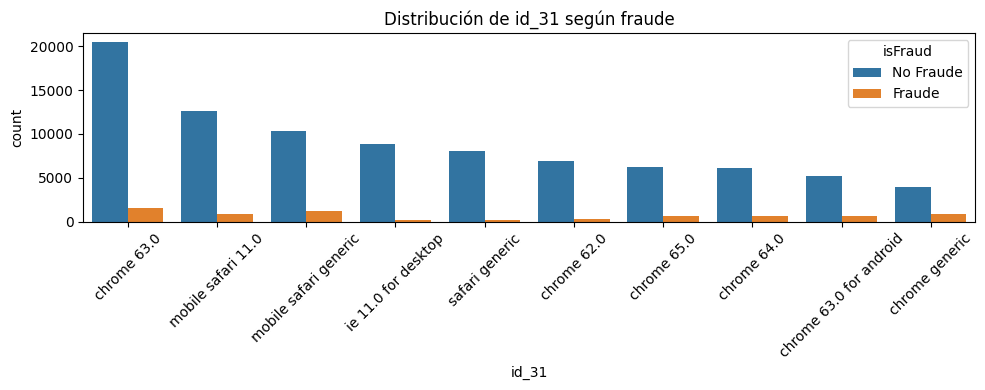

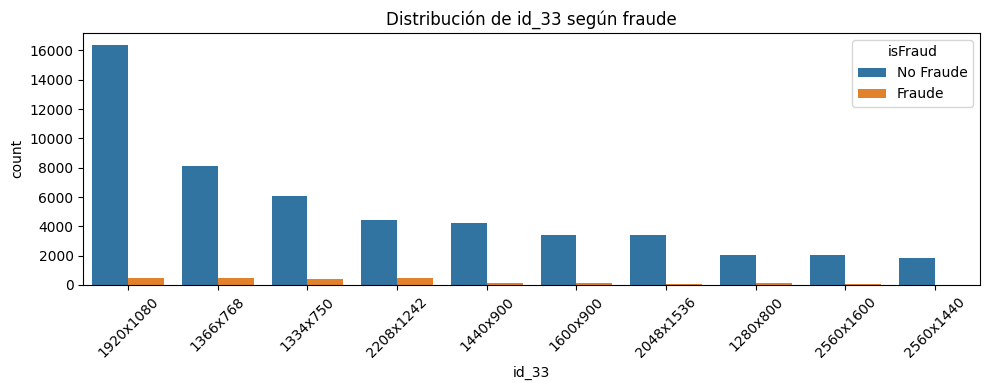

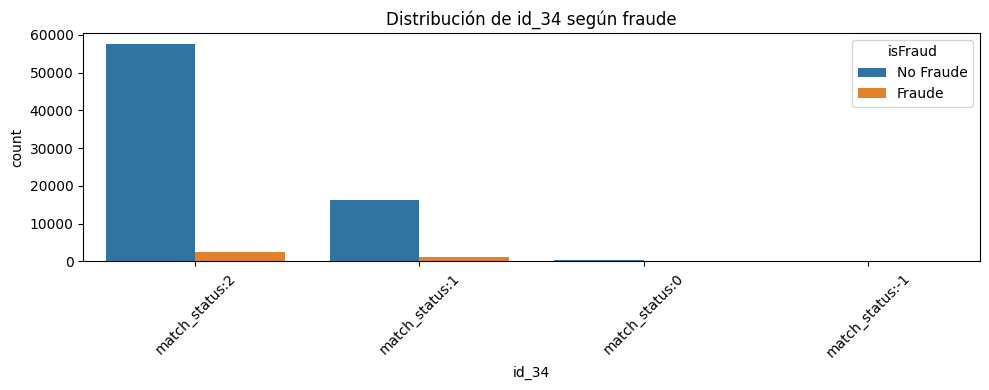

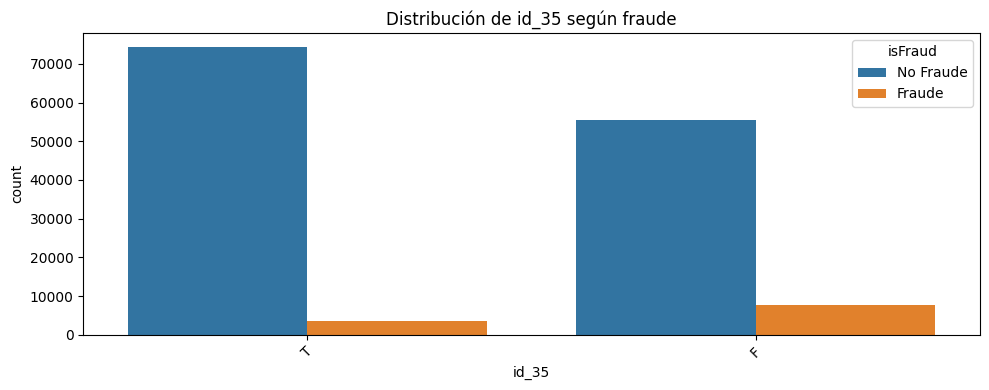

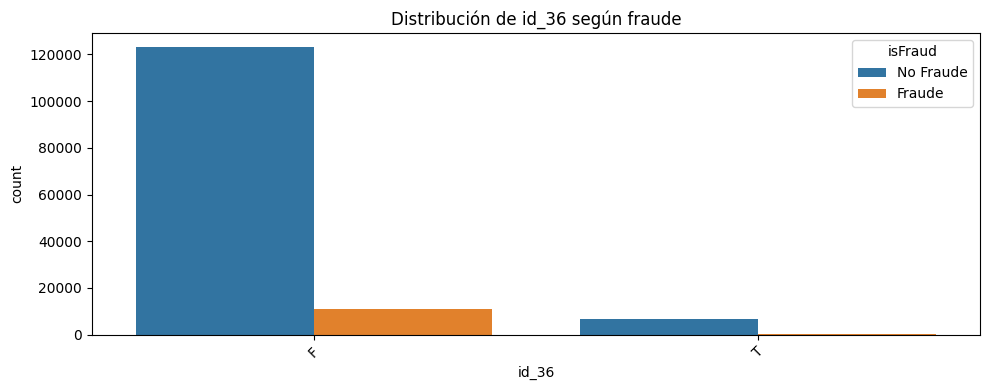

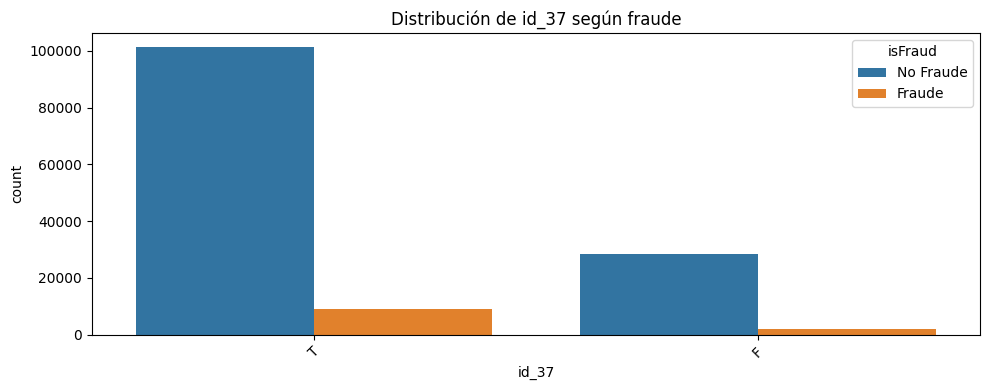

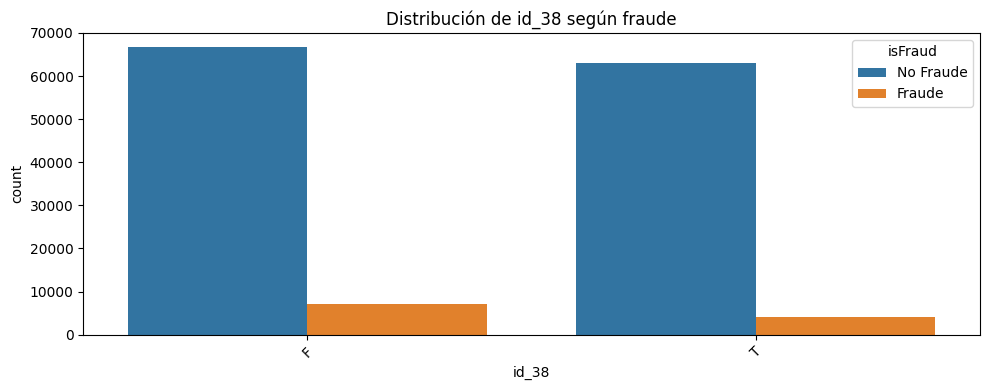

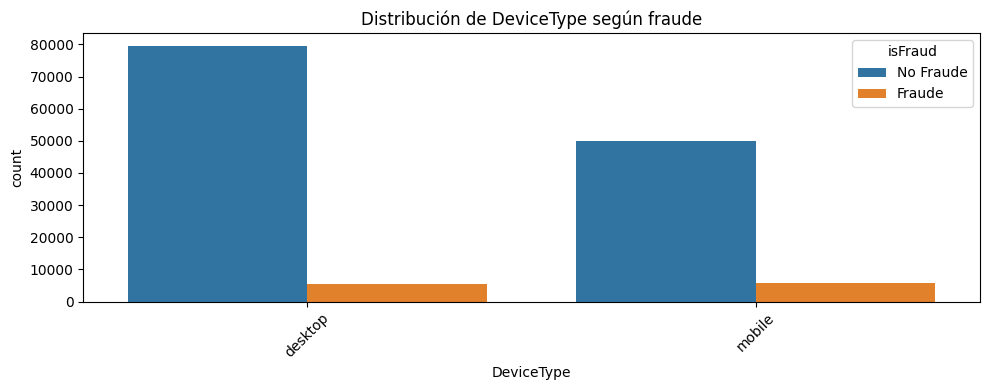

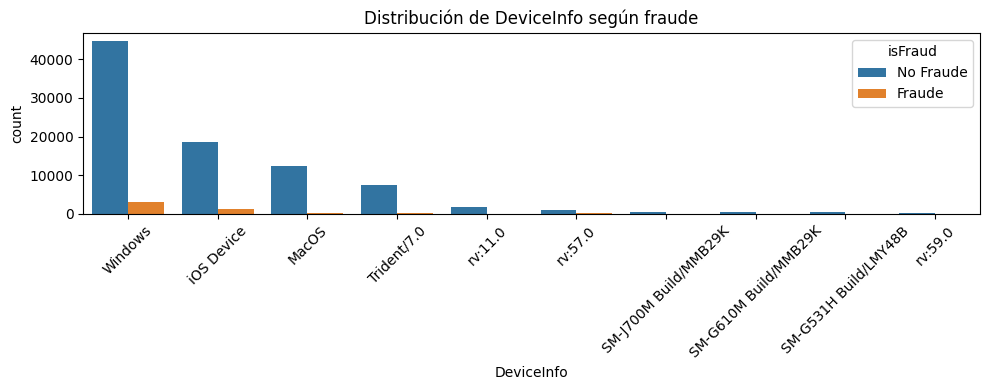

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=train, x=col, order=train[col].value_counts().iloc[:10].index, hue='isFraud')
    plt.title(f'Distribución de {col} según fraude')
    plt.xticks(rotation=45)
    plt.legend(title='isFraud', labels=['No Fraude', 'Fraude'])
    plt.tight_layout()
    plt.show()


In [ ]:
for col in cat_cols:
    print(f"\Cantidad de fraude por categoría en {col}:")
    print(train.groupby(col)['isFraud'].sum().sort_values(ascending=False))


Proporción de fraude por categoría en ProductCD:
ProductCD
W    8969
C    8008
H    1574
R    1426
S     686
Name: isFraud, dtype: int64

Proporción de fraude por categoría en card4:
card4
visa                13373
mastercard           6496
discover              514
american express      239
Name: isFraud, dtype: int64

Proporción de fraude por categoría en card6:
card6
debit              10674
credit              9950
charge card            0
debit or credit        0
Name: isFraud, dtype: int64

Proporción de fraude por categoría en P_emaildomain:
P_emaildomain
gmail.com           9943
hotmail.com         2396
yahoo.com           2297
anonymous.com        859
aol.com              617
outlook.com          482
comcast.net          246
icloud.com           197
mail.com             106
msn.com               90
live.com              84
outlook.es            57
bellsouth.net         53
ymail.com             50
live.com.mx           41
aim.com               40
protonmail.com        31
att.n

Para ver mejor la proporción de fraude en cada categoría de las variables categóricas:

In [ ]:
for col in cat_cols:
    print(f"\nProporción de fraude por categoría en {col}:")
    print(train.groupby(col)['isFraud'].mean().sort_values(ascending=False))


Proporción de fraude por categoría en ProductCD:
ProductCD
C    0.116873
S    0.058996
H    0.047662
R    0.037826
W    0.020399
Name: isFraud, dtype: float64

Proporción de fraude por categoría en card4:
card4
discover            0.077282
visa                0.034756
mastercard          0.034331
american express    0.028698
Name: isFraud, dtype: float64

Proporción de fraude por categoría en card6:
card6
credit             0.066785
debit              0.024263
charge card        0.000000
debit or credit    0.000000
Name: isFraud, dtype: float64

Proporción de fraude por categoría en P_emaildomain:
P_emaildomain
protonmail.com      0.407895
mail.com            0.189624
outlook.es          0.130137
aim.com             0.126984
outlook.com         0.094584
hotmail.es          0.065574
live.com.mx         0.054740
hotmail.com         0.052950
gmail.com           0.043542
yahoo.fr            0.034965
embarqmail.com      0.034615
mac.com             0.032110
icloud.com          0.031434
com

El producto que mas aparece es W y por ser el más frecuente es en el que más caso de fraude hay. Sin embargo, no es el que mayor proporción de fraude presenta, al contrario, es el que menos. Mientras que la mayor proporción de fraude la presenta el producto C.

La tarjeta más usada es VISA, pero es Discover, la menos usada, la que presnta mayor proporción de casos de fraude y aunque las de débito son las más usadas, las de crédito triplican la proporción de fraude

En cuanto al P_emaildomain (dominio del mail del comprador), solo hay 31 de protonmail.com pero el 40% son fraude. gmail.com, hotmail.com y yahoo.com son los dominios mas frecuentes con proporciones de fraude 0.043542, 0.052950,  0.022757

Respecto al R_emaildomain (dominio del mail del destinatario) el 95% de los correos con ese dominio son fraude, aunque solo haya 39 datos, el porcentaje es muy alto

In [ ]:
import pandas as pd

# Agrupar por 'id_31' y calcular
summary = train.groupby("id_31").agg(
    total_ocurrencias=("id_31", "count"),   # número total de veces que aparece
    num_fraudes=("isFraud", "sum")          # número de fraudes (asumiendo que isFraud es 0/1)
)

# Añadir la proporción de fraudes
summary["proporcion_fraudes"] = summary["num_fraudes"] / summary["total_ocurrencias"]

# Ordenar para ver mejor (opcional)
summary = summary.sort_values(by="total_ocurrencias", ascending=False)

print(summary.head(15))  # ver las 15 primeras categorías


                         total_ocurrencias  num_fraudes  proporcion_fraudes
id_31                                                                      
chrome 63.0                          22000         1503            0.068318
mobile safari 11.0                   13423          842            0.062728
mobile safari generic                11474         1146            0.099878
ie 11.0 for desktop                   9030          175            0.019380
safari generic                        8195          205            0.025015
chrome 62.0                           7182          299            0.041632
chrome 65.0                           6871          679            0.098821
chrome 64.0                           6711          615            0.091641
chrome 63.0 for android               5806          653            0.112470
chrome generic                        4778          803            0.168062
chrome 66.0                           4264          398            0.093340
edge 16.0   

## Correlacion

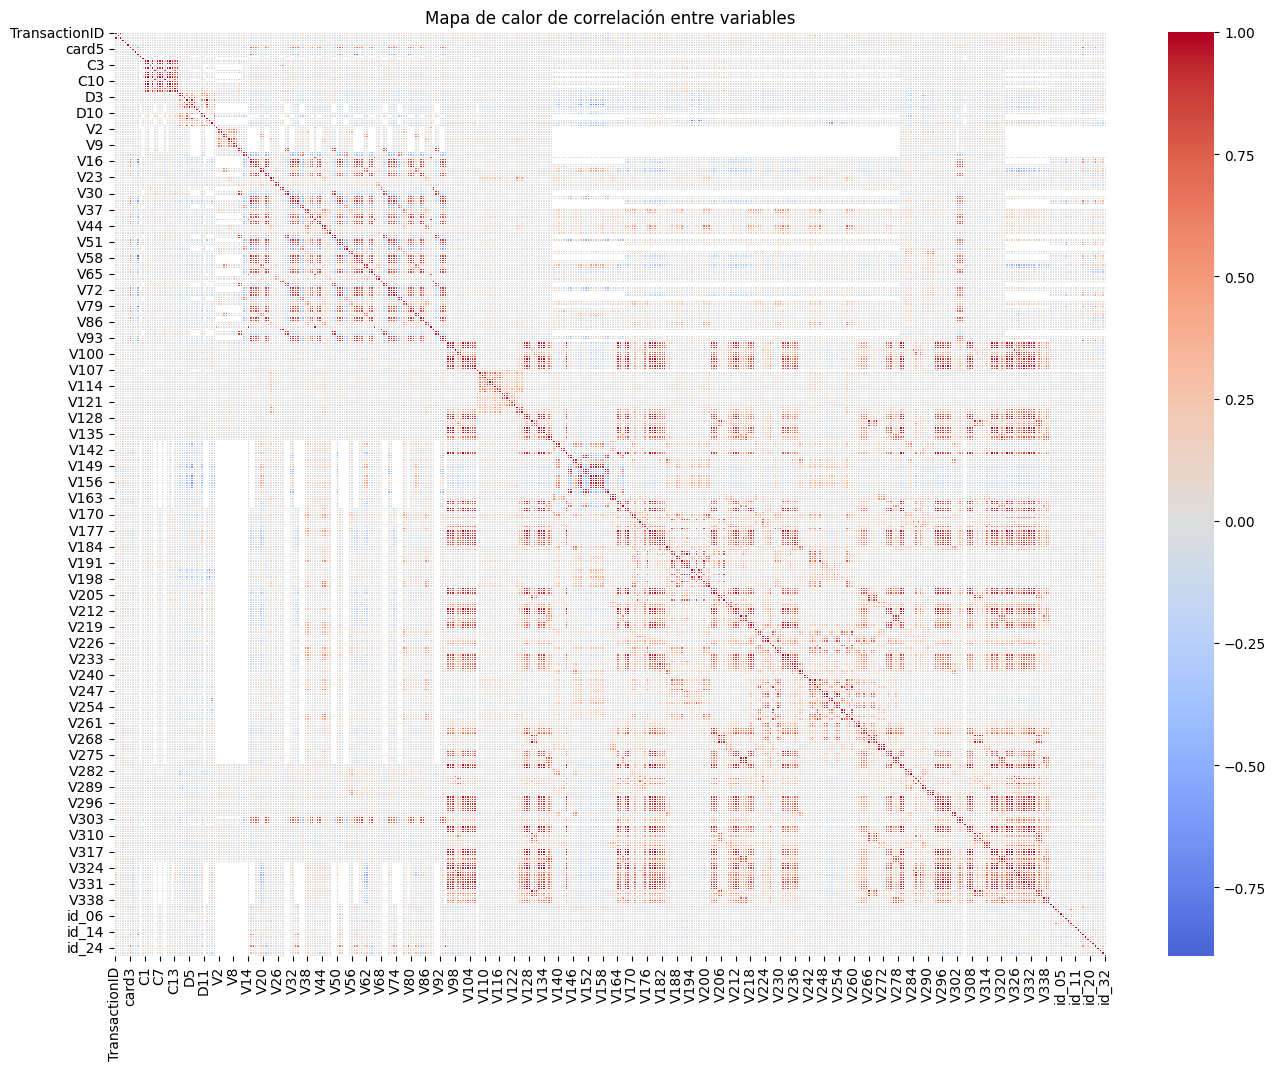

In [ ]:
#matriz de correlacion
corr_matrix = train.corr(numeric_only=True)

#heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de correlación entre variables')
plt.show()

In [ ]:
#  columnas
cols = list(train.columns)

# posición de 'C13' e 'isFraud'
c13_index = cols.index('C13')
d1_index = cols.index('D1')
d15_index = cols.index('D15')
m1_index = cols.index('M1')
m9_index = cols.index('M9')
v1_index = cols.index('V1')
v91_index = cols.index('V91')
isFraud_index = cols.index('isFraud')

# Primer bloque: desde el principio hasta V91 (inclusive), más isFraud
cols_part1 = cols[:c13_index+1] + ['isFraud'] if 'isFraud' not in cols[:c13_index+1] else cols[:c13_index+1]
cols_part2 = cols[d1_index:d15_index+1] + ['isFraud'] if 'isFraud' not in cols[d1_index:d15_index+1] else cols[d1_index:d15_index+1]
cols_part3 = cols[m1_index:m9_index+1] + ['isFraud'] if 'isFraud' not in cols[m1_index:m9_index+1] else cols[m1_index:m9_index+1]
cols_part4 = cols[v1_index:v91_index+1] + ['isFraud'] if 'isFraud' not in cols[v1_index:v91_index+1] else cols[v1_index:v91_index+1]

# Segundo bloque: desde después de V91 hasta el final, asegurando que isFraud esté incluido
#cols_part = cols[v91_index+1:] if 'isFraud' not in cols[v91_index+1:] else [col for col in cols[v91_index+1:] if col != 'isFraud']
#cols_part += ['isFraud']

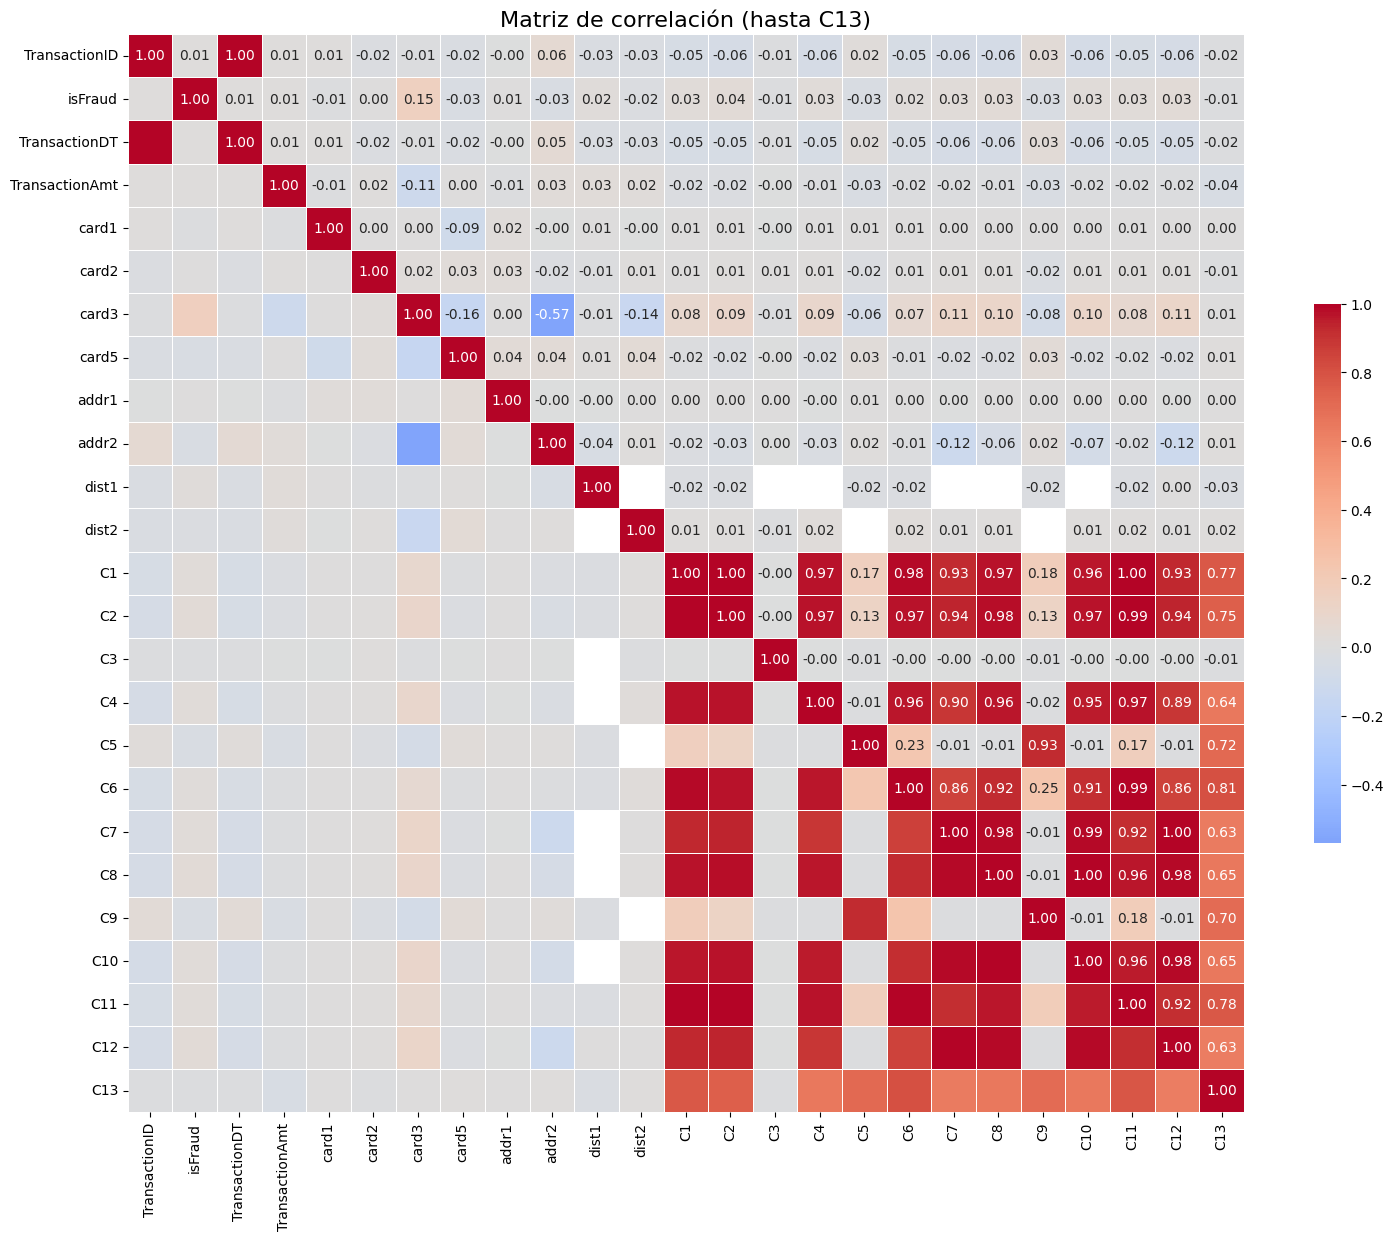

In [ ]:
corr1 = train[cols_part1].corr(numeric_only=True)

# Crear máscara para la mitad superior
mask = np.triu(np.ones_like(corr1, dtype=bool))

# Inicializar el gráfico
f, ax = plt.subplots(figsize=(18, 14))

# Dibujar heatmap con anotaciones solo en la mitad superior
sns.heatmap(corr1, mask=~mask, cmap='coolwarm', center=0,
            annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Dibujar solo colores en la mitad inferior
sns.heatmap(corr1, mask=mask, cmap='coolwarm', center=0,
            annot=False, linewidths=.5, cbar=False)

plt.title('Matriz de correlación (hasta C13)', fontsize=16)
plt.show()

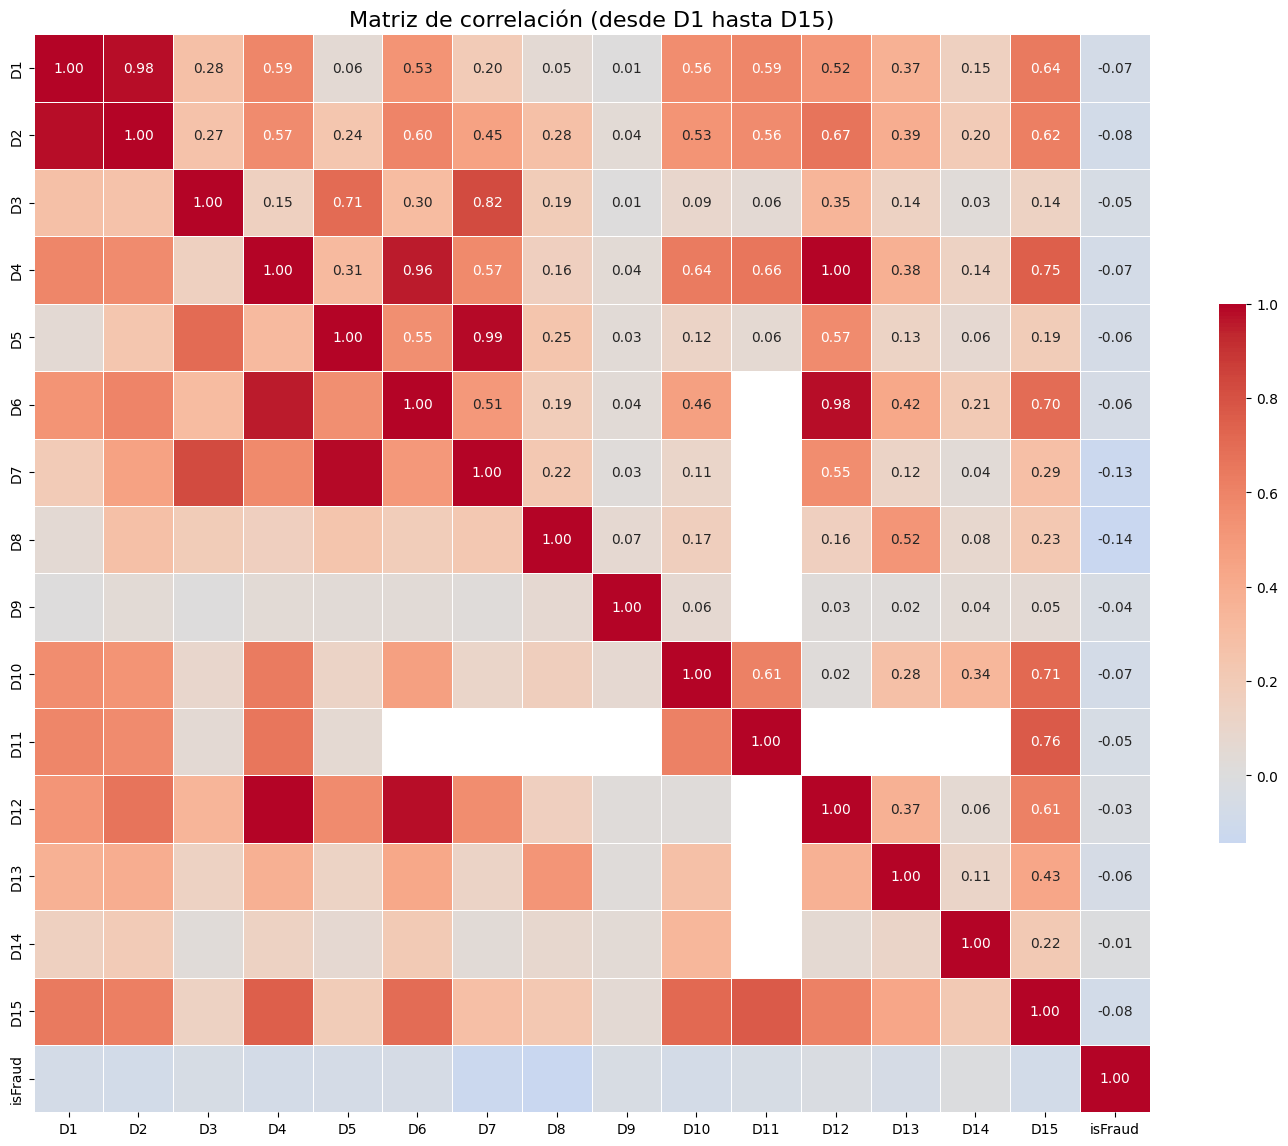

In [ ]:
corr2 = train[cols_part2].corr(numeric_only=True)

# Crear máscara para la mitad superior
mask = np.triu(np.ones_like(corr2, dtype=bool))

# Inicializar el gráfico
f, ax = plt.subplots(figsize=(18, 14))

# Dibujar heatmap con anotaciones solo en la mitad superior
sns.heatmap(corr2, mask=~mask, cmap='coolwarm', center=0,
            annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Dibujar solo colores en la mitad inferior
sns.heatmap(corr2, mask=mask, cmap='coolwarm', center=0,
            annot=False, linewidths=.5, cbar=False)

plt.title('Matriz de correlación (desde D1 hasta D15)', fontsize=16)
plt.show()

In [ ]:
train["D11"].isnull().sum()

np.int64(279287)

In [ ]:
train["D15"].isnull().sum()

np.int64(89113)

In [ ]:
train["D10"].isnull().sum()

np.int64(76022)

CON COLS_PART3 NO TIENE SENTIDO VER CORRRELACION PORQUE M1-M9 SON CATEGORICAS, NO NUMERICAS




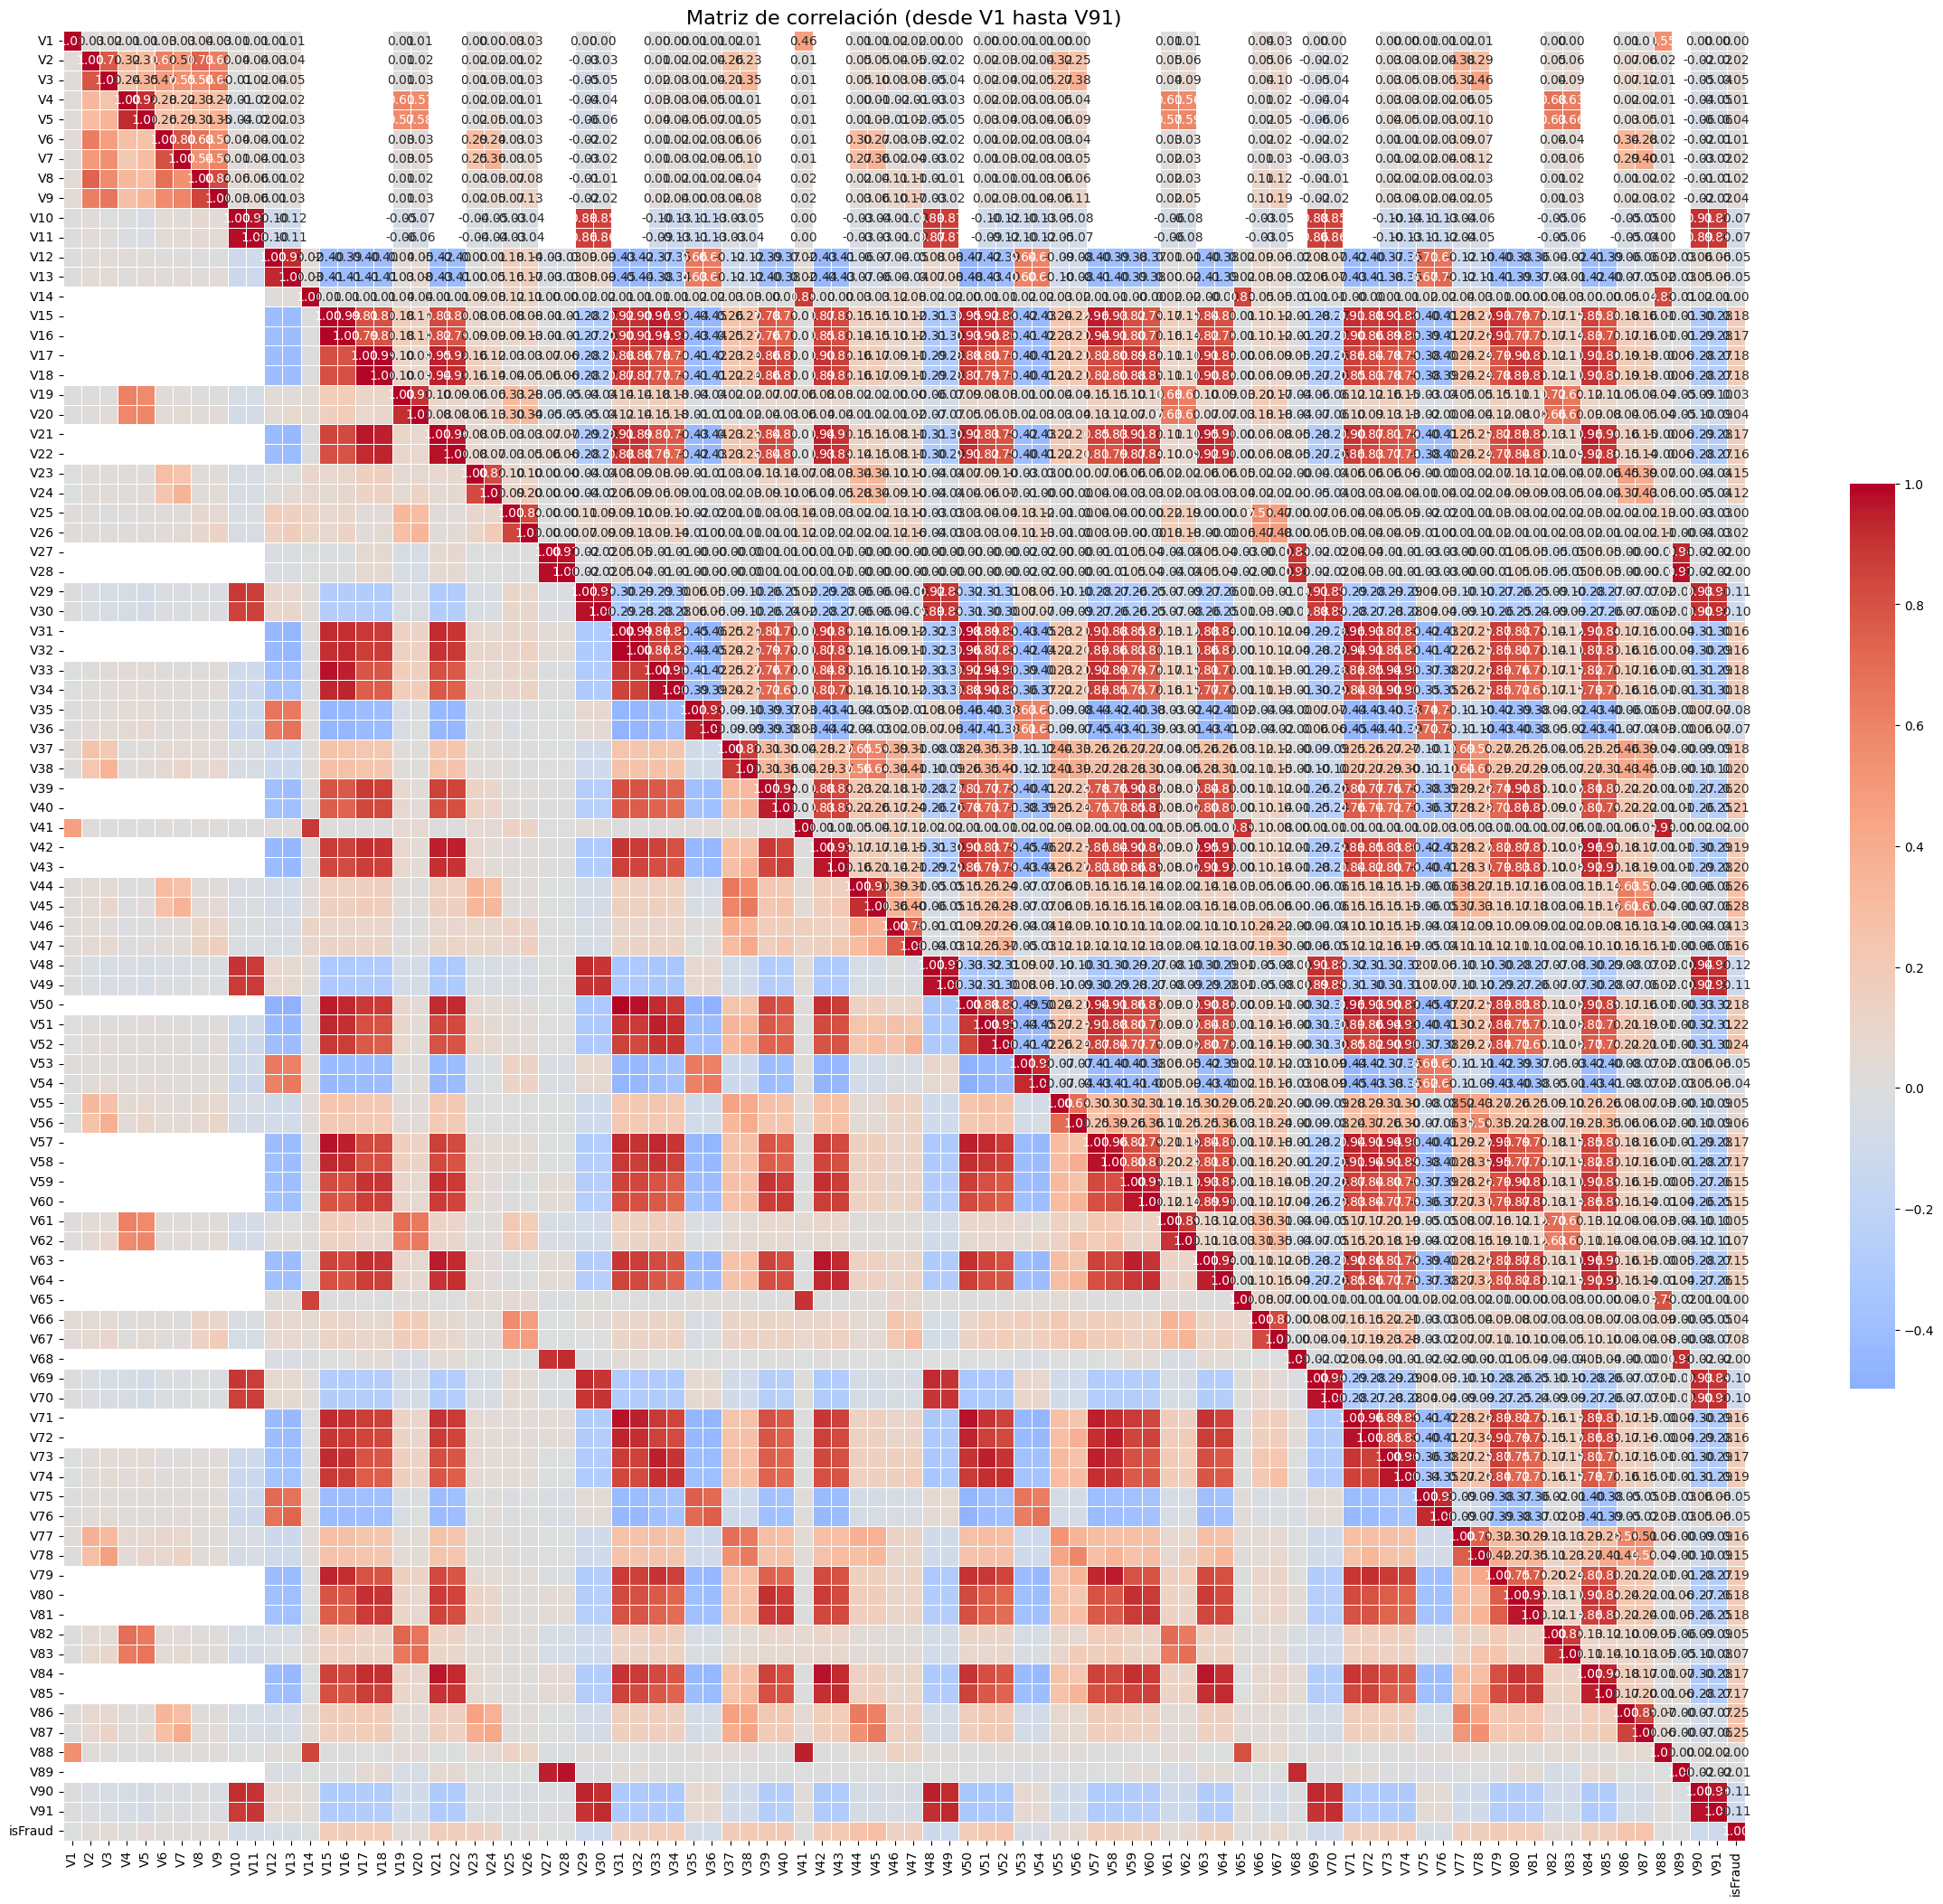

In [ ]:
corr4 = train[cols_part4].corr(numeric_only=True)

# Crear máscara para la mitad superior
mask = np.triu(np.ones_like(corr4, dtype=bool))

# Inicializar el gráfico
f, ax = plt.subplots(figsize=(30, 26))

# Dibujar heatmap con anotaciones solo en la mitad superior
sns.heatmap(corr4, mask=~mask, cmap='coolwarm', center=0,
            annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Dibujar solo colores en la mitad inferior
sns.heatmap(corr4, mask=mask, cmap='coolwarm', center=0,
            annot=False, linewidths=.5, cbar=False)

plt.title('Matriz de correlación (desde V1 hasta V91)', fontsize=16)
plt.show()

ES INVIABLE MOSTRAR LA CORRELACION DE V1 A V339 EN UN HEATMAP
VOY A INTENAR VER LAS VARIABLES MAS CORRELACIONADAS

In [ ]:
v1_index = cols.index('V1')
v339_index = cols.index('V339')
cols_v = cols[v1_index:v339_index+1]

In [ ]:
corr_matrix = train[cols_v].corr()
# Crear un dataframe de pares con correlación > 0.8
high_corr = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr.columns = ['var1', 'var2', 'correlation']
high_corr = high_corr[high_corr['correlation'].abs() > 0.8]
print(high_corr)

       var1  var2  correlation
429      V4    V5     0.915164
987      V8    V9     0.835342
1260    V10   V11     0.968670
1269    V10   V29     0.879585
1270    V10   V30     0.848616
...     ...   ...          ...
51714  V333  V338     0.823754
51717  V334  V336     0.906312
51721  V335  V336     0.914130
51729  V337  V339     0.907378
51730  V338  V339     0.940009

[2519 rows x 3 columns]


In [ ]:
import pandas as pd

# Mostrar todas las filas
pd.set_option('display.max_rows', None)

# Si quieres ver todas las columnas también
pd.set_option('display.max_columns', None)

# Ahora imprime tu dataframe
print(high_corr)


       var1  var2  correlation
429      V4    V5     0.915164
987      V8    V9     0.835342
1260    V10   V11     0.968670
1269    V10   V29     0.879585
1270    V10   V30     0.848616
1282    V10   V48     0.893391
1283    V10   V49     0.869053
1294    V10   V69     0.883022
1295    V10   V70     0.853592
1307    V10   V90     0.907758
1308    V10   V91     0.871561
1403    V11   V29     0.860054
1404    V11   V30     0.856554
1416    V11   V48     0.870965
1417    V11   V49     0.865761
1428    V11   V69     0.863515
1429    V11   V70     0.861591
1441    V11   V90     0.887701
1442    V11   V91     0.884841
1529    V12   V13     0.925848
1890    V14   V41     0.880084
1914    V14   V65     0.844338
1937    V14   V88     0.834647
2189    V15   V16     0.986727
2190    V15   V17     0.808584
2191    V15   V18     0.801746
2194    V15   V21     0.834541
2204    V15   V31     0.915194
2205    V15   V32     0.899566
2206    V15   V33     0.958773
2207    V15   V34     0.922002
2215    

VARIABLES A ELIMINAR

In [ ]:
# Lista de variables a eliminar
variables_a_eliminar = [
    "TransactionDT",
    "C2", "C4", "C6", "C7", "C8", "C10", "C11", "C12", "C13",
    "C9" ,
    "D2", "D12", "D6", "D7", "D11", "D15",
    "V4", "V8", "V11", "V29", "V30", "V48", "V49", "V69", "V70", "V90", "V91",
    "V13", "V41", "V65", "V88", "V16", "V17", "V18", "V21", "V31", "V32", "V33", "V34",
    "V42", "V43", "V50", "V51", "V52", "V57", "V58", "V59", "V63", "V71", "V72",
    "V73", "V74", "V79", "V84", "V92", "V93", "V94", "V20", "V39", "V60",
    "V64", "V80", "V81", "V85", "V302", "V304", "V24", "V26",
    "V28", "V68", "V89", "V36", "V38", "V45", "V54", "V62", "V67",
    "V76", "V83", "V87", "V96", "V97", "V101", "V102", "V103", "V105",
    "V126", "V127", "V128", "V132", "V133", "V134", "V143", "V164",
    "V165", "V167", "V168", "V177", "V178", "V179", "V202", "V203",
    "V204", "V211", "V212", "V213", "V217", "V218", "V219", "V231",
    "V232", "V233", "V273", "V275", "V279", "V280", "V293", "V294",
    "V295", "V298", "V306", "V307", "V308", "V316", "V317", "V318", "V322",
    "V323", "V324", "V329", "V331", "V332", "V333", "V325", "V100",
    "V285", "V326", "V327", "V106", "V181", "V183", "V235", "V236",
    "V237", "V297", "V299", "V328", "V330", "V311", "V334", "V336", "V335",
    "V312", "V137", "V320", "V338", "V140", "V142", "V145", "V151", "V152", "V159",
    "V160", "V147", "V149", "V153", "V154", "V155", "V156", "V157", "V158", "V162", "V163", "V200",
    "V186", "V191", "V196", "V207", "V190", "V199", "V228", "V182", "V234", "V296",
    "V185", "V192", "V193", "V189", "V195", "V197", "V268",
    "V216", "V276", "V277", "V278", "V319", "V321", "V222", "V245",
    "V259", "V225", "V229", "V248", "V253", "V254", "V261", "V267",
    "V258", "V239", "V244", "V246", "V249",
    "V252", "V251", "V256", "V265", "V274", "V271", "V272",
    "V289", "V292", "V301", "V315", "V339"
]

# Eliminar columnas del DataFrame
train = train.drop(columns=variables_a_eliminar)
test = test.drop(columns=variables_a_eliminar)

print(train.shape)   # para ver dimensiones finales
print(test.shape)
print(train.head())  # para confirmar que ya no aparecen esas variables



(590540, 209)
(506691, 208)
   TransactionID  isFraud  TransactionAmt ProductCD  card1  card2  card3  \
0        2987000        0            68.5         W  13926    NaN  150.0   
1        2987001        0            29.0         W   2755  404.0  150.0   
2        2987002        0            59.0         W   4663  490.0  150.0   
3        2987003        0            50.0         W  18132  567.0  150.0   
4        2987004        0            50.0         H   4497  514.0  150.0   

        card4  card5   card6  ...                id_31  id_32      id_33  \
0    discover  142.0  credit  ...                  NaN    NaN        NaN   
1  mastercard  102.0  credit  ...                  NaN    NaN        NaN   
2        visa  166.0   debit  ...                  NaN    NaN        NaN   
3  mastercard  117.0   debit  ...                  NaN    NaN        NaN   
4  mastercard  102.0  credit  ...  samsung browser 6.2   32.0  2220x1080   

            id_34 id_35 id_36  id_37  id_38  DeviceType  \

Ver matriz correlacion despues de eliminar las variables altamente correlacionadas

## Outliers

In [ ]:
# variables numéricas
numericas_cols = train.select_dtypes(include=['float64', 'int64']).columns
numericas_cols = numericas_cols.drop('isFraud') #quitar isFraud

#guardar outliers detectados
outlier_summary = {}

for col in numericas_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #numero de outliers
    outliers = ((train[col] < lower_bound) | (train[col] > upper_bound)).sum()
    total = train[col].notna().sum()
    outlier_summary[col] = round(100 * outliers / total, 2)  # % de outliers

# Mostrar variables con más del 1% de outliers
for col, perc in outlier_summary.items():
    if perc > 1:
        print(f"{col}: {perc}% de outliers")


TransactionAmt: 11.26% de outliers
card3: 11.49% de outliers
dist1: 16.78% de outliers
dist2: 12.52% de outliers
C1: 10.08% de outliers
C5: 10.24% de outliers
C14: 16.27% de outliers
D1: 12.59% de outliers
D3: 9.85% de outliers
D5: 13.45% de outliers
D8: 9.4% de outliers
D10: 7.8% de outliers
D13: 21.16% de outliers
D14: 23.39% de outliers
V2: 3.97% de outliers
V3: 6.64% de outliers
V5: 21.97% de outliers
V6: 4.06% de outliers
V7: 6.35% de outliers
V9: 3.74% de outliers
V15: 12.13% de outliers
V19: 21.15% de outliers
V22: 12.88% de outliers
V23: 3.05% de outliers
V25: 3.35% de outliers
V37: 6.25% de outliers
V40: 15.12% de outliers
V44: 5.67% de outliers
V46: 2.21% de outliers
V47: 3.57% de outliers
V55: 4.71% de outliers
V56: 7.94% de outliers
V61: 21.28% de outliers
V66: 4.41% de outliers
V77: 5.37% de outliers
V78: 8.67% de outliers
V82: 19.7% de outliers
V86: 4.88% de outliers
V95: 13.5% de outliers
V98: 5.35% de outliers
V99: 10.11% de outliers
V104: 4.52% de outliers
V109: 1.44% 

Aunque hay bastantes outliers, pueden ser datos importantes o infomativos y dado que las redes neuronales no suelen ser sensibles a valores atípicos (si se normalizan adecuadamente), considero que no es conveniente eliminarlos pues sería perder información





# preprocesado

In [ ]:
from multiprocessing import Pool, cpu_count
from collections import defaultdict
from sklearn.cluster import FeatureAgglomeration
from scipy.stats import normaltest, skew
import json

In [ ]:
def patron_faltante(args):
  #Función auxiliar que procesa una columna y su máscara de valores faltantes.
  # Args:
  #        args: Tupla con (nombre_columna, mascara_faltantes)
  # Returns:
  #            Tupla con (nombre_columna, patron_faltantes)
    col, col_mask = args
    return (col, tuple(col_mask))

def columnas_faltantes_juntas(df):
     #Identifica grupos de columnas que siempre tienen valores faltantes en las mismas filas.
     # Args:
     #  df: DataFrame de pandas a analizar
     #Returns:
     #   Lista de listas, donde cada sublista contiene columnas que faltan juntas

    np.random.seed(42)
    indices_aleat = np.random.choice(df.index, size=50000, replace=False)
    # tomamos 50k filas para no perder memoria ni tiempo
    indices_orden = np.sort(indices_aleat) #los ordenamos
    df_muestra = df.loc[indices_orden] #muestra

    #Creamos una máscara booleana que indica dónde hay valores faltantes.
    mask_falta = df_muestra.isna()
    #Eliminar columnas que siempre tienen valores o siempre están faltantes
    mask_filtrada = mask_falta.loc[:, (mask_falta.sum() > 0) & (mask_falta.sum() < len(mask_falta))]
    #nos quedamos con esas columnas
    cols = mask_filtrada.columns

    #procesamiento en paralelo
    with Pool(cpu_count()) as pool:
        patrones_columnas = pool.map(patron_faltante, [(col, mask_filtrada[col].values) for col in cols])
    # Agrupamos columnas por patrones de faltantes idénticos
    grupos_patrones = defaultdict(list)
    for col, patron in patrones_columnas:
        grupos_patrones[patron].append(col)
    # Nos quedamos solo con grupos de 2 o mas columnas que faltan juntas
    col_faltan_juntas = [grupo for grupo in grupos_patrones.values() if len(grupo) > 1]
    # Retorna solo los grupos con más de una columna (columnas que faltan juntas).
    return col_faltan_juntas

#Aplicamos la funcion a train
col_faltan_juntas = columnas_faltantes_juntas(train)
#Imprimimos cada grupo
for group in col_faltan_juntas:
    print("Columnas que faltan juntas:", group)

Columnas que faltan juntas: ['addr1', 'addr2']
Columnas que faltan juntas: ['D1', 'V281', 'V282', 'V283', 'V288', 'V300', 'V313', 'V314']
Columnas que faltan juntas: ['D8', 'D9', 'id_09', 'id_10']
Columnas que faltan juntas: ['M1', 'M2', 'M3']
Columnas que faltan juntas: ['M8', 'M9']
Columnas que faltan juntas: ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V9', 'V10']
Columnas que faltan juntas: ['V12', 'V14', 'V15', 'V19', 'V22', 'V23', 'V25', 'V27']
Columnas que faltan juntas: ['V35', 'V37', 'V40', 'V44', 'V46', 'V47']
Columnas que faltan juntas: ['V53', 'V55', 'V56', 'V61', 'V66']
Columnas que faltan juntas: ['V75', 'V77', 'V78', 'V82', 'V86']
Columnas que faltan juntas: ['V95', 'V98', 'V99', 'V104', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V129', 'V130', 'V131', 'V135', 'V136']
Columnas que faltan juntas: ['V138', 'V139', 'V141', 'V144', 'V146', 'V148', 'V150', 'V161', 'V166']
Co

Antes de agrupar las columnas que faltan juntas, vamos a identificar las variables categoricas porque estas van independientes de esta agrupacion

In [ ]:
categorical_cols = train.select_dtypes(
    include=['object','category']).columns.tolist()
print(categorical_cols)

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


In [ ]:
test.select_dtypes(
    include=['object','category']).columns.tolist()

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id-12',
 'id-15',
 'id-16',
 'id-23',
 'id-27',
 'id-28',
 'id-29',
 'id-30',
 'id-31',
 'id-33',
 'id-34',
 'id-35',
 'id-36',
 'id-37',
 'id-38',
 'DeviceType',
 'DeviceInfo']

Observé que tenía problemas porque las variables en test se separaban por guión en lugar de por guión bajo como en train, aunque se referían a lo mismo, así que la cambié

In [ ]:
test.columns = test.columns.str.replace('-', '_')

In [ ]:
def agrupar_columnas_faltantes(df, grupos, categorical_cols, n_clusters=1, max_group_size=20):
  #  Agrupa columnas numéricas con patrones similares de valores faltantes mediante clustering aglomerativo.
  # Parámetros:
  #  df : DataFrame
  #  grupos : Lista de grupos de columnas que faltan juntas (de columnas_faltantes_juntas)
  # columnas_categoricas :   Columnas categóricas que se excluirán del proceso
  #  n_clusters : Número de clusters a crear por grupo
  # tamaño_max_grupo :  Tamaño máximo permitido para procesar un grupo
  # Return:
  #     DataFrame modificado con las nuevas columnas agrupadas

    for i, grupo in enumerate(grupos, 1):
        # # Filtramos solo columnas numéricas del grupo
        numeric_group = [col for col in grupo if col not in categorical_cols]
        #ignorar grupos no validos, que no se van a agrupar
        if len(numeric_group) < 2 or len(numeric_group) > max_group_size:
            continue
        try:
            # Filtrar filas donde al menos una columna del grupo NO sea NaN
            mask = ~df[numeric_group].isna().all(axis=1)
            #si no hay filas con valores, saltamos el grupo
            if mask.sum() == 0:
                continue

            # imputamos en el cluster
            X = df.loc[mask, numeric_group].fillna(df[numeric_group].mean())

            # Aplicamos clustering aglomerativo
            agg = FeatureAgglomeration(n_clusters=n_clusters)
            red = agg.fit_transform(X)

            # Guardar columna aglomerada y borrar originales
            col_nombre = f"A{i}"
            df[col_nombre] = np.nan
            df.loc[mask, col_nombre] = red.ravel()
            df.drop(columns=numeric_group, inplace=True) #eliminamos originales

        except Exception as e:
            print(f"Error en grupo {i} ({numeric_group}): {e}")
            continue

    return df


In [ ]:
train_red = agrupar_columnas_faltantes(train, col_faltan_juntas, categorical_cols)
train_red.head()

TransactionID  isFraud  TransactionAmt ProductCD  card1  card2  card3  \
0        2987000        0            68.5         W  13926    NaN  150.0   
1        2987001        0            29.0         W   2755  404.0  150.0   
2        2987002        0            59.0         W   4663  490.0  150.0   
3        2987003        0            50.0         W  18132  567.0  150.0   
4        2987004        0            50.0         H   4497  514.0  150.0   

        card4  card5   card6  ...  A10         A12       A13   A14       A15  \
0    discover  142.0  credit  ...  0.8         NaN       NaN   NaN       NaN   
1  mastercard  102.0  credit  ...  0.8         NaN       NaN   NaN       NaN   
2        visa  166.0   debit  ...  1.0         NaN       NaN   NaN       NaN   
3  mastercard  117.0   debit  ...  1.0         NaN       NaN   NaN       NaN   
4  mastercard  102.0  credit  ...  NaN  517.888889  0.428571  0.25  0.428571   

      A16  A18  A19  A20  A22  
0     NaN  NaN  NaN  NaN  NaN  
1     NaN  NaN  NaN  NaN  NaN  
2     NaN  NaN  NaN  NaN  NaN  
3     NaN  NaN  NaN  NaN  NaN  
4  0.5625  NaN  NaN  NaN  NaN  

[5 rows x 118 columns]

In [ ]:
train_red.shape

(590540, 118)

In [ ]:
test_red = agrupar_columnas_faltantes(test, col_faltan_juntas, categorical_cols)

In [ ]:
test_red.head()

TransactionID  TransactionAmt ProductCD  card1  card2  card3       card4  \
0        3663549           31.95         W  10409  111.0  150.0        visa   
1        3663550           49.00         W   4272  111.0  150.0        visa   
2        3663551          171.00         W   4476  574.0  150.0        visa   
3        3663552          284.95         W  10989  360.0  150.0        visa   
4        3663553           67.95         W  18018  452.0  150.0  mastercard   

   card5  card6   dist1  ...  A10 A12 A13  A14  A15  A16  A18  A19  A20  A22  
0  226.0  debit     1.0  ...  0.8 NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  226.0  debit     4.0  ...  1.0 NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  226.0  debit  2635.0  ...  1.2 NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  166.0  debit    17.0  ...  1.0 NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  117.0  debit     6.0  ...  1.0 NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 117 columns]

In [ ]:
test_red.shape

(506691, 117)

In [ ]:
#common_cols = list(set(train_red.columns) & set(test_red.columns))

In [ ]:
#numeric_cols = [col for col in common_cols if np.issubdtype(train_red[col].dtype, np.number)]

Transformacion de variables categoricas

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    train_red[col] = train_red[col].fillna('missing')
    test_red[col] = test_red[col].fillna('missing')

    le = LabelEncoder()
    le.fit(list(train_red[col]) + list(test_red[col]))  # Aprende de ambos datasets, si no me da problemas en test

    train_red[col] = le.transform(train_red[col])
    test_red[col] = le.transform(test_red[col])

# Muestreo

El conjunto de datos es muy grande para algunas operaciones como la posterior imputación de nulos con MICE, por lo que se utilizará una muestra más reducida mediante muestreo estratificado para la proporción de la variable objetivo

In [ ]:
TRAIN_SIZE = 30000

count_NotF, count_F = train_red['isFraud'].value_counts()
prop_F = count_F / (count_NotF + count_F)

num_F = int(TRAIN_SIZE * prop_F)
num_NotF = TRAIN_SIZE - num_F

df_NotF = train_red[train_red['isFraud'] == 0].sample(num_NotF, random_state=42)
df_F = train_red[train_red['isFraud'] == 1].sample(num_F, random_state=42)

train_reducido = pd.concat([df_NotF, df_F]).sample(frac=1, random_state=42)
print(f"Train reducido: {train_reducido.shape}")

Train reducido: (30000, 118)


In [ ]:
train_reducido.head()

TransactionID  isFraud  TransactionAmt  ProductCD  card1  card2  \
531340        3518340        0           280.0          4  13256  583.0   
510740        3497740        0           141.0          4   6077  555.0   
123893        3110893        0           226.0          4   2616    NaN   
345621        3332621        0            44.0          4   7815  161.0   
235694        3222694        0           445.0          4  16075  514.0   

        card3  card4  card5  card6  ...  A10  A12  A13  A14  A15  A16  A18  \
531340  150.0      2  219.0      1  ...  0.8  NaN  NaN  NaN  NaN  NaN  NaN   
510740  150.0      4  226.0      2  ...  1.0  NaN  NaN  NaN  NaN  NaN  NaN   
123893  150.0      1  102.0      1  ...  1.0  NaN  NaN  NaN  NaN  NaN  NaN   
345621  150.0      2  117.0      2  ...  1.0  NaN  NaN  NaN  NaN  NaN  NaN   
235694  150.0      2  102.0      1  ...  1.0  NaN  NaN  NaN  NaN  NaN  NaN   

        A19  A20  A22  
531340  NaN  NaN  NaN  
510740  NaN  NaN  NaN  
123893  NaN  NaN  NaN  
345621  NaN  NaN  NaN  
235694  NaN  NaN  NaN  

[5 rows x 118 columns]

#IMPUTAR NULOS CON MICE

In [ ]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_reducido, test_size=0.2, random_state=42)

X_train = train_df.drop('isFraud', axis=1)
y_train = train_df['isFraud']

X_val = val_df.drop('isFraud', axis=1)
y_val = val_df['isFraud']

numeric_cols = [col for col in X_train.columns if np.issubdtype(train_df[col].dtype, np.number) and col != 'TransactionID' ]

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd




In [ ]:
preprocessor = Pipeline([
    ('imputer', IterativeImputer(
        max_iter=5,
        n_nearest_features=5,
        initial_strategy='median',
        random_state=42,
        sample_posterior=False
    )),
    ('scaler', StandardScaler())
])

In [ ]:
#sample_size = min(50000, len(train_red))
#train_sample = train_red.sample(sample_size, random_state=42)
preprocessor.fit(X_train[numeric_cols])

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Pipeline(steps=[('imputer',
                 IterativeImputer(initial_strategy='median', max_iter=5,
                                  n_nearest_features=5, random_state=42)),
                ('scaler', StandardScaler())])

In [ ]:
def fast_impute(df, preprocessor, cols, chunk_size=50000):
    chunks = np.array_split(df, max(1, len(df) // chunk_size))
    results = []
    for chunk in chunks:
        chunk_copy = chunk.copy()
        chunk_copy[cols] = preprocessor.transform(chunk_copy[cols])
        results.append(chunk_copy)
    return pd.concat(results, ignore_index=True)

In [ ]:
print("Imputando train...")
#train_red = fast_impute(train_reducido, preprocessor, missing_cols)
X_train = fast_impute(X_train, preprocessor, numeric_cols)

Imputando train...


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
print("Imputando val...")
#train_red = fast_impute(train_reducido, preprocessor, missing_cols)
X_val = fast_impute(X_val, preprocessor, numeric_cols)

Imputando val...


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
print("Imputando test...")
test_red = fast_impute(test_red, preprocessor, numeric_cols)


Imputando test...


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
hay_nulos = np.isnan(test_red.values).any()

print("¿Hay nulos en test_np?", hay_nulos)

¿Hay nulos en test_np? False


In [ ]:
hay_nulos = np.isnan(X_train.values).any()

print("¿Hay nulos en train?", hay_nulos)

¿Hay nulos en train? False


In [ ]:
#CONTAR NUMERO DE VALORES PERDIDOS
# Número total de columnas
total_cols = train_red.shape[1]

# Por ejemplo, mostrar de 20 en 20
step = 20

for i in range(0, total_cols, step):
    print(f"Columnas {i} a {i+step}")
    display(train_red.isnull().sum().iloc[i:i+step])


Columnas 0 a 20


TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
card2             0
card3             0
card4             0
card5             0
card6             0
dist1             0
dist2             0
P_emaildomain     0
R_emaildomain     0
C1                0
C2                0
C3                0
C4                0
C5                0
dtype: int64

Columnas 20 a 40


C6     0
C7     0
C8     0
C9     0
C10    0
C11    0
C12    0
C13    0
C14    0
D2     0
D3     0
D4     0
D5     0
D6     0
D7     0
D10    0
D12    0
D13    0
D14    0
D15    0
dtype: int64

Columnas 40 a 60


M1     0
M2     0
M3     0
M4     0
M5     0
M6     0
M7     0
M8     0
M9     0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
dtype: int64

Columnas 60 a 80


V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V53    0
V54    0
V55    0
V56    0
V57    0
V58    0
V59    0
V60    0
dtype: int64

Columnas 80 a 100


V61     0
V62     0
V63     0
V64     0
V65     0
V66     0
V67     0
V68     0
V69     0
V70     0
V71     0
V72     0
V73     0
V74     0
V95     0
V96     0
V97     0
V98     0
V99     0
V100    0
dtype: int64

Columnas 100 a 120


V101    0
V102    0
V103    0
V104    0
V105    0
V106    0
V107    0
V108    0
V109    0
V110    0
V111    0
V112    0
V113    0
V114    0
V115    0
V116    0
V117    0
V118    0
V119    0
V120    0
dtype: int64

Columnas 120 a 140


V121    0
V122    0
V123    0
V124    0
V125    0
V126    0
V127    0
V128    0
V129    0
V130    0
V131    0
V132    0
V133    0
V134    0
V135    0
V136    0
V137    0
V138    0
V139    0
V140    0
dtype: int64

Columnas 140 a 160


V141    0
V142    0
V143    0
V144    0
V145    0
V146    0
V147    0
V148    0
V149    0
V150    0
V151    0
V152    0
V153    0
V154    0
V155    0
V156    0
V157    0
V158    0
V159    0
V160    0
dtype: int64

Columnas 160 a 180


V161    0
V162    0
V163    0
V164    0
V165    0
V166    0
V167    0
V168    0
V172    0
V173    0
V176    0
V177    0
V178    0
V179    0
V181    0
V182    0
V183    0
V186    0
V187    0
V190    0
dtype: int64

Columnas 180 a 200


V191    0
V192    0
V193    0
V196    0
V199    0
V202    0
V203    0
V204    0
V205    0
V206    0
V207    0
V211    0
V212    0
V213    0
V214    0
V215    0
V216    0
V217    0
V218    0
V219    0
dtype: int64

Columnas 200 a 220


V223    0
V224    0
V225    0
V226    0
V228    0
V229    0
V230    0
V231    0
V232    0
V233    0
V235    0
V236    0
V237    0
V240    0
V241    0
V242    0
V243    0
V244    0
V246    0
V247    0
dtype: int64

Columnas 220 a 240


V248    0
V249    0
V252    0
V253    0
V254    0
V257    0
V258    0
V260    0
V261    0
V262    0
V263    0
V264    0
V265    0
V266    0
V267    0
V268    0
V269    0
V273    0
V274    0
V275    0
dtype: int64

Columnas 240 a 260


V276    0
V277    0
V278    0
V279    0
V280    0
V284    0
V285    0
V286    0
V287    0
V290    0
V291    0
V292    0
V293    0
V294    0
V295    0
V297    0
V298    0
V299    0
V302    0
V303    0
dtype: int64

Columnas 260 a 280


V304     0
V305     0
V306     0
V307     0
V308     0
V309     0
V310     0
V311     0
V312     0
V316     0
V317     0
V318     0
V319     0
V320     0
V321     0
id_01    0
id_02    0
id_11    0
id_12    0
id_13    0
dtype: int64

Columnas 280 a 300


id_14    0
id_15    0
id_16    0
id_17    0
id_18    0
id_19    0
id_20    0
id_21    0
id_23    0
id_24    0
id_25    0
id_27    0
id_28    0
id_29    0
id_30    0
id_31    0
id_32    0
id_33    0
id_34    0
id_35    0
dtype: int64

Columnas 300 a 320


id_36         0
id_37         0
id_38         0
DeviceType    0
DeviceInfo    0
A1            0
A2            0
A3            0
A4            0
A8            0
A10           0
A14           0
A16           0
A17           0
A19           0
A20           0
A21           0
A23           0
dtype: int64

#BALANCEO CON CLASSWEIGHT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# 3. Calcular pesos de clase
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))
print("Pesos por clase:", class_weights)


Pesos por clase: {np.int64(0): np.float64(0.5175760189777874), np.int64(1): np.float64(14.723926380368098)}


# MODELOS

In [ ]:
pip install tensorflow

##Modelo 1 RNA

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall

# 4. Definir la red
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

# 5. Entrenamiento con class_weight
history = model1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=512,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
    class_weight=class_weights,
    verbose=2
)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 - 2s - 51ms/step - accuracy: 0.5088 - loss: 6089.9834 - precision: 0.0341 - recall: 0.4920 - val_accuracy: 0.9610 - val_loss: 24.7277 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
47/47 - 0s - 5ms/step - accuracy: 0.4705 - loss: 5814.2681 - precision: 0.0331 - recall: 0.5166 - val_accuracy: 0.9610 - val_loss: 52.6729 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
47/47 - 0s - 6ms/step - accuracy: 0.4890 - loss: 2568.3552 - precision: 0.0317 - recall: 0.4761 - val_accuracy: 0.9610 - val_loss: 104.4384 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
47/47 - 0s - 5ms/step - accuracy: 0.5306 - loss: 1437.7117 - precision: 0.0361 - recall: 0.4994 - val_accuracy: 0.0390 - val_loss: 1438.9895 - val_precision: 0.0390 - val_recall: 1.0000


In [ ]:
# Evaluar en validación
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones (probabilidades)
y_pred_prob = model1.predict(X_val)

# Aplica umbral de 0.5 para convertir a clases
y_pred = (y_pred_prob >= 0.5).astype(int)

# Reporte de clasificación
print(classification_report(y_val, y_pred))

# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_val, y_pred))

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5766
           1       0.00      0.00      0.00       234

    accuracy                           0.96      6000
   macro avg       0.48      0.50      0.49      6000
weighted avg       0.92      0.96      0.94      6000

Matriz de Confusión:
[[5766    0]
 [ 234    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El modelo tiene alta precisión global (96%), pero no detecta correctamente la clase minoritaria (1): casi todos los casos positivos son clasificados erróneamente como negativos (recall = 0.00). La matriz de confusión muestra solo 1 verdadero positivo frente a 209 falsos negativos, lo que indica un grave problema de desequilibrio y que el modelo ignora prácticamente la clase minoritaria. Esto lo hace poco útil si la clase 1 es importante

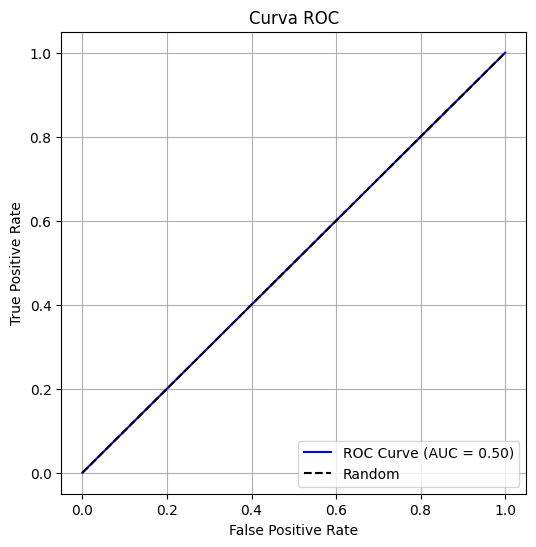

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
auc = roc_auc_score(y_val, y_pred_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
##SUBIDA A KAGGLE
import numpy as np
import pandas as pd

# Tamaño del batch
batch_size = 10000

# Predecir por lotes
y_test_prob = []
for i in range(0, len(test_red), batch_size):
    batch = test_red[i:i + batch_size]
    preds = model1.predict(batch).ravel()
    y_test_prob.extend(preds)

# Convertir a array de NumPy
y_test_prob = np.array(y_test_prob)

# Aplicar umbral
#y_test_pred = (y_test_prob >= 0.5).astype(int)

# Crear CSV para Kaggle
submission = pd.DataFrame({
    'TransactionID': test_red['TransactionID'],
    'isFraud': y_test_prob
})

submission.to_csv('Modelo1RNA_CW.csv', index=False)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━

In [ ]:
from google.colab import files
files.download('Modelo1RNA_CW.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Como se ha hecho para smote, probamos otro modelo cambiando la funcion de perdia y añadiendo batch normalization y dropout

## Modelo 2 RNA

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fn(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)

        # Focal Loss
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        alpha_factor = y_true * alpha + (1 - y_true) * (1 - alpha)
        modulating_factor = K.pow((1 - p_t), gamma)

        loss = -alpha_factor * modulating_factor * K.log(p_t)
        return K.mean(loss)
    return focal_loss_fn

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization
# 4. Definir la red con Focal Loss
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


# Compilar con Focal Loss (se puede ajustar gamma y alpha)
model2.compile(
    optimizer='adam',
    loss=focal_loss(gamma=2.0, alpha=0.25),  # Usando Focal Loss calculada
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

# 5. Entrenamiento
history = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=512,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True, monitor='val_recall', mode='max')],
    class_weight=class_weights,
    verbose=2
)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 - 3s - 61ms/step - accuracy: 0.5362 - loss: 0.2246 - precision: 0.0367 - recall: 0.5018 - val_accuracy: 0.9610 - val_loss: 0.0639 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
47/47 - 1s - 18ms/step - accuracy: 0.6982 - loss: 0.1232 - precision: 0.0360 - recall: 0.3055 - val_accuracy: 0.9610 - val_loss: 0.0228 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
47/47 - 0s - 6ms/step - accuracy: 0.8192 - loss: 0.0812 - precision: 0.0356 - recall: 0.1656 - val_accuracy: 0.9610 - val_loss: 0.0190 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
47/47 - 0s - 7ms/step - accuracy: 0.8824 - loss: 0.0583 - precision: 0.0304 - recall: 0.0798 - val_accuracy: 0.9610 - val_loss: 0.0227 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predicciones (probabilidades)
y_pred_prob = model2.predict(X_val)

# Evaluación con diferentes umbrales
for threshold in [0.1, 0.2, 0.3, 0.5]:
    y_pred = (y_pred_prob >= threshold).astype(int)
    print(f"\nEvaluación con umbral {threshold:.1f}:")
    print(classification_report(y_val, y_pred))
    print("Matriz de Confusión:")
    print(confusion_matrix(y_val, y_pred))

# Métrica AUC-ROC (importante para clases desbalanceadas)
print("\nAUC-ROC:", roc_auc_score(y_val, y_pred_prob))

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluación con umbral 0.1:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5766
           1       0.00      0.00      0.00       234

    accuracy                           0.96      6000
   macro avg       0.48      0.50      0.49      6000
weighted avg       0.92      0.96      0.94      6000

Matriz de Confusión:
[[5766    0]
 [ 234    0]]

Evaluación con umbral 0.2:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5766
           1       0.00      0.00      0.00       234

    accuracy                           0.96      6000
   macro avg       0.48      0.50      0.49      6000
weighted avg       0.92      0.96      0.94      6000

Matriz de Confusión:
[[5766    0]
 [ 234    0]]

Evaluación con umbral 0.3:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5766
           1    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

Umbral 0.1 y 0.2:en ambos casos, el modelo clasifica todos los ejemplos como positivos (clase 1). Esto da un recall perfecto (1.00) para la clase minoritaria, pero precisión nula (0.00–0.04) y accuracy bajísima (4%), ya que todos los negativos (clase 0) son mal clasificados. El modelo está demasiado inclinado hacia detectar la clase minoritaria, pero lo hace a costa de miles de falsos positivos.

Umbral 0.3: el modelo empieza a discriminar algo mejor: detecta el 53% de la clase 1 con ligera mejora en precisión (0.04). La clase 0 mejora en precisión (0.97) pero su recall cae al 47%. El accuracy sube al 47%, pero aún la mayoría de las predicciones son incorrectas. El modelo sigue confundido, con muchos errores en ambas clases.

Umbral 0.5: se obtiene un buen accuracy (71%), y la clase 0 se clasifica con alta precisión (0.96) y recall moderado (0.72). Sin embargo, la clase 1 sigue con muy baja precisión (0.03) y recall bajo (0.27). Aunque hay cierta mejora respecto a umbrales bajos, el modelo sigue teniendo serias dificultades para identificar correctamente los positivos (clase 1)

AUC-ROC: 0.497-> este valor está prácticamente al azar, es casi 0.5, lo que indica que el modelo no está aprendiendo a discriminar entre clases de forma efectiva. A pesar del uso de Focal Loss y class_weights, aún no logra una separación útil entre clases, probablemente por el fuerte desbalance.

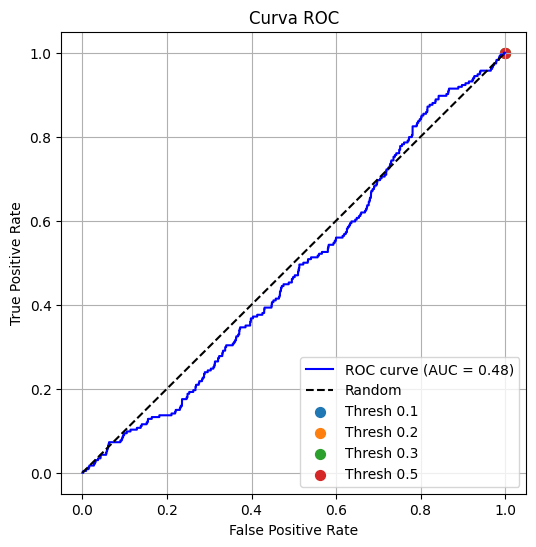

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
auc = roc_auc_score(y_val, y_pred_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Marcar los puntos para cada umbral que analizaste
for thresh in [0.1, 0.2, 0.3, 0.5]:
    y_temp = (y_pred_prob >= thresh).astype(int)
    fpr_t, tpr_t, _ = roc_curve(y_val, y_temp)
    plt.scatter(fpr_t[1], tpr_t[1], label=f'Thresh {thresh:.1f}', s=50)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Tamaño del batch
batch_size = 10000

# Predecir probabilidades por lotes (solo una vez)
y_test_prob = []
for i in range(0, len(test_red), batch_size):
    batch = test_red[i:i + batch_size]
    preds = model2.predict(batch).ravel()
    y_test_prob.extend(preds)

y_test_prob = np.array(y_test_prob)

# Para cada umbral, generar predicciones y CSV
for threshold in [0.1, 0.2, 0.3, 0.5]:
    #y_test_pred = (y_test_prob >= threshold).astype(int)

    submission = pd.DataFrame({
        'TransactionID': test_red['TransactionID'],
        'isFraud': y_test_prob
    })

    filename = f'Modelo2RNA_CW_umbral_{int(threshold*100)}.csv'
    submission.to_csv(filename, index=False)
    print(f"Guardado: {filename}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━

In [ ]:
from google.colab import files
files.download('Modelo2RNA_CW_umbral_10.csv')
files.download('Modelo2RNA_CW_umbral_20.csv')
files.download('Modelo2RNA_CW_umbral_30.csv')
files.download('Modelo2RNA_CW_umbral_50.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Modelo 3 TabNet

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.6 MB/s eta 0:00:00


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch
from sklearn.metrics import classification_report

# Datos originales
X_train_np = X_train.values
y_train_np = y_train.values
X_val_np = X_val.values
y_val_np = y_val.values

# 1. Calcular los pesos por clase
classes = np.unique(y_train_np)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_np)
class_weights = dict(zip(classes, weights))
print("Pesos por clase:", class_weights)

# 2. Crear un vector de pesos por muestra (uno por fila en y_train_np)
sample_weights = np.where(y_train_np == 0, weights[0], weights[1])

# 3. Inicializar TabNet
tabnet = TabNetClassifier(
    n_d=16, n_a=16, n_steps=5,
    gamma=1.5, n_independent=2,
    n_shared=2, seed=42,
    verbose=10
)

# 4. Entrenamiento con sample_weights
tabnet.fit(
    X_train_np, y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    max_epochs=100,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    weights=sample_weights
)

# 5. Evaluación
y_pred = tabnet.predict(X_val_np)
print(classification_report(y_val_np, y_pred))


Pesos por clase: {np.int64(0): np.float64(0.5175760189777874), np.int64(1): np.float64(14.723926380368098)}


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.82103 | val_0_auc: 0.60373 |  0:00:04s
epoch 10 | loss: 0.53992 | val_0_auc: 0.76836 |  0:00:38s
epoch 20 | loss: 0.49041 | val_0_auc: 0.80473 |  0:01:14s
epoch 30 | loss: 0.44085 | val_0_auc: 0.81494 |  0:01:50s
epoch 40 | loss: 0.40233 | val_0_auc: 0.81386 |  0:02:24s
epoch 50 | loss: 0.35927 | val_0_auc: 0.81494 |  0:02:58s

Early stopping occurred at epoch 51 with best_epoch = 31 and best_val_0_auc = 0.8159


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


              precision    recall  f1-score   support

           0       0.98      0.83      0.90      5766
           1       0.14      0.67      0.23       234

    accuracy                           0.82      6000
   macro avg       0.56      0.75      0.56      6000
weighted avg       0.95      0.82      0.87      6000



In [ ]:
# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_val_np, y_pred))

Matriz de Confusión:
[[4764 1002]
 [  77  157]]


En comparación con este TabNet en SMOTE, la clase 1 se detecta mejor aqui, con un recall más alto (0.72 vs. 0.64) y una ligera mejora en f1-score (0.20 vs. 0.17).

La precisión de la clase 1 sigue siendo baja (0.11), pero mejora levemente respecto a SMOTE.

Accuracy general: 79% (ligeramente mejor que 78%).

F1 y  recall también mejoran, indicando mejor equilibrio entre clases.

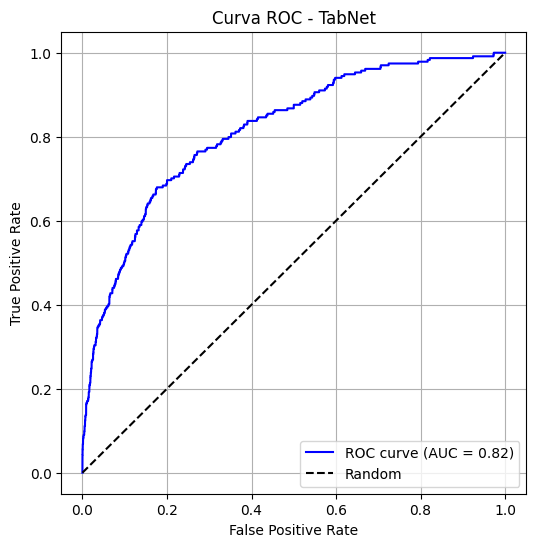

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener probabilidades de clase positiva (1)
y_pred_prob = tabnet.predict_proba(X_val_np)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_val_np, y_pred_prob)
auc_score = roc_auc_score(y_val_np, y_pred_prob)

# Graficar
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - TabNet')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd

test_np = test_red.values

In [ ]:
# TabNet predicción completa
y_test_prob = tabnet.predict_proba(test_np)[:, 1]  # Probabilidad de clase 1

In [ ]:
# Aplica umbral
#y_test_pred = (y_test_prob >= 0.5).astype(int)

In [ ]:
# Genera CSV para Kaggle
submission = pd.DataFrame({
    'TransactionID': test_red['TransactionID'].values,
    'isFraud': y_test_prob
})

submission.to_csv('Modelo3TabNet.csv', index=False)
print(" CSV guardado como Modelo3TabNet.csv")

 CSV guardado como Modelo3TabNet.csv


In [ ]:
from google.colab import files
files.download('Modelo3TabNet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Modelo 4 SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


# Sin SMOTE, con class_weight
svm_weighted = SVC(kernel='rbf', class_weight='balanced',probability=True, random_state=42)
svm_weighted.fit(X_train, y_train)

# Evaluar
y_pred = svm_weighted.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.46      0.62      5766
           1       0.04      0.59      0.08       234

    accuracy                           0.47      6000
   macro avg       0.50      0.52      0.35      6000
weighted avg       0.93      0.47      0.60      6000



In [ ]:
# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_val, y_pred))

Matriz de Confusión:
[[2653 3113]
 [  97  137]]


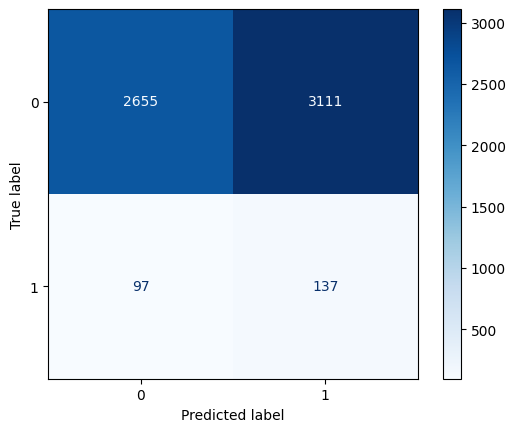

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

disp.plot(cmap='Blues')

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

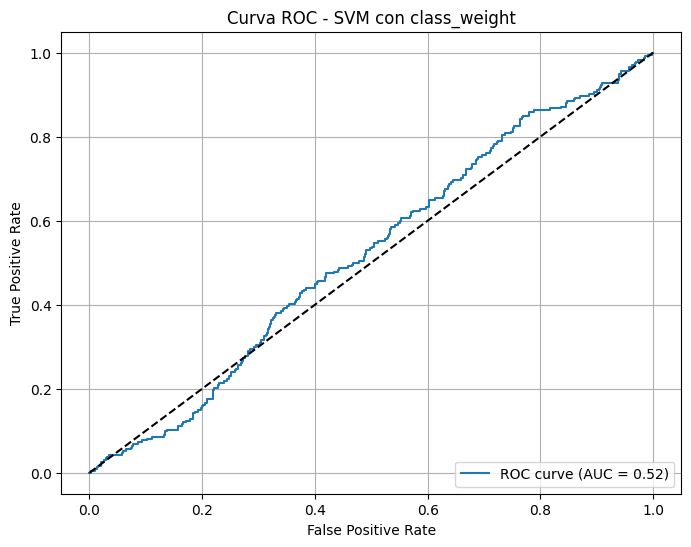

In [ ]:
y_pred_prob = svm_weighted.predict_proba(X_val)[:, 1]

fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - SVM con class_weight')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
##SUBIDA A KAGGLE
import numpy as np
import pandas as pd

# Tamaño del batch
batch_size = 10000

# Predecir por lotes
y_test_prob = []
for i in range(0, len(test_red), batch_size):
    batch = test_red[i:i + batch_size]
    preds = svm_weighted.predict(batch).ravel()
    y_test_prob.extend(preds)

# Convertir a array de NumPy
y_test_prob = np.array(y_test_prob)

# Aplicar umbral
#y_test_pred = (y_test_prob >= 0.5).astype(int)

# Crear CSV para Kaggle
submission = pd.DataFrame({
    'TransactionID': test_red['TransactionID'],
    'isFraud': y_test_prob
})

submission.to_csv('ModeloSVM_CW.csv', index=False)

In [ ]:
from google.colab import files
files.download('ModeloSVM_CW.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Modelo 5 XGBoost

In [ ]:
from xgboost import XGBClassifier

# 1. Calcular el peso de la clase minoritaria
# Fórmula: n_neg / n_pos
n_pos = sum(y_train == 1)
n_neg = sum(y_train == 0)
scale_pos_weight = n_neg / n_pos

# 2. Entrenar el modelo con class_weight
xgb_weighted = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_weighted.fit(X_train, y_train)

# 3. Evaluar
y_pred_weighted = xgb_weighted.predict(X_val)
print(classification_report(y_val, y_pred_weighted))
print(confusion_matrix(y_val, y_pred_weighted))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:07:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5766
           1       0.50      0.41      0.45       234

    accuracy                           0.96      6000
   macro avg       0.74      0.69      0.71      6000
weighted avg       0.96      0.96      0.96      6000

[[5672   94]
 [ 139   95]]


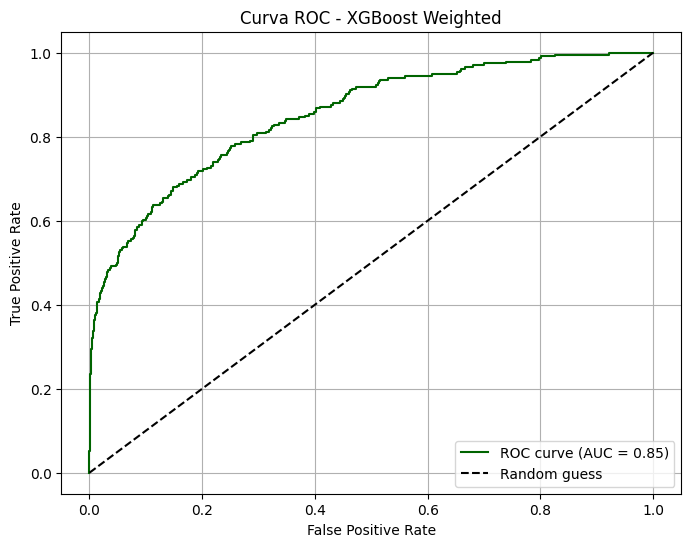

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades para la clase 1
y_pred_prob = xgb_weighted.predict_proba(X_val)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkgreen')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - XGBoost Weighted')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
##SUBIDA A KAGGLE
import numpy as np
import pandas as pd

# Tamaño del batch
batch_size = 10000

# Predecir por lotes
y_test_prob = []
for i in range(0, len(test_red), batch_size):
    batch = test_red[i:i + batch_size]
    preds = xgb_weighted.predict(batch).ravel()
    y_test_prob.extend(preds)

# Convertir a array de NumPy
y_test_prob = np.array(y_test_prob)

# Aplicar umbral
#y_test_pred = (y_test_prob >= 0.5).astype(int)

# Crear CSV para Kaggle
submission = pd.DataFrame({
    'TransactionID': test_red['TransactionID'],
    'isFraud': y_test_prob
})

submission.to_csv('ModeloXGBoost_CW.csv', index=False)

In [ ]:
from google.colab import files
files.download('ModeloXGBoost_CW.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Modelo 6 LightGBM

In [ ]:
from lightgbm import LGBMClassifier

# Calcular scale_pos_weight = no_fraude / fraude
n_fraud = sum(y_train == 1)
n_nonfraud = sum(y_train == 0)
scale_weight = n_nonfraud / n_fraud

# Entrenar LightGBM con peso de clase
lgbm_weighted = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=7,
    num_leaves=31,
    scale_pos_weight=scale_weight,  #  peso para fraude
    random_state=42
)
lgbm_weighted.fit(X_train, y_train)

# Evaluar
y_pred_weighted = lgbm_weighted.predict(X_val)
print(classification_report(y_val, y_pred_weighted))

[LightGBM] [Info] Number of positive: 815, number of negative: 23185
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13742
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033958 -> initscore=-3.348073
[LightGBM] [Info] Start training from score -3.348073
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val, y_pred_weighted))

[[5469  297]
 [ 101  133]]


mejor VP pero peor en FP que con smote

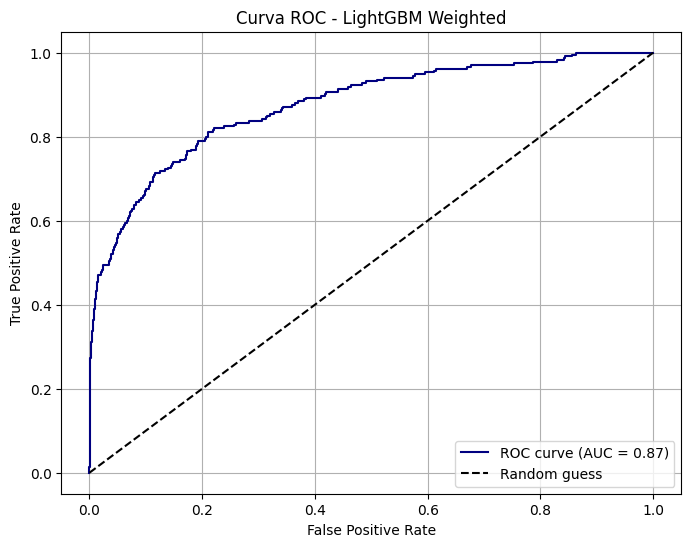

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilidades para la clase 1 (fraude)
y_pred_prob = lgbm_weighted.predict_proba(X_val)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='navy')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - LightGBM Weighted')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
##SUBIDA A KAGGLE
import numpy as np
import pandas as pd

# Tamaño del batch
batch_size = 10000

# Predecir por lotes
y_test_prob = []
for i in range(0, len(test_red), batch_size):
    batch = test_red[i:i + batch_size]
    preds = lgbm_weighted.predict(batch).ravel()
    y_test_prob.extend(preds)

# Convertir a array de NumPy
y_test_prob = np.array(y_test_prob)

# Aplicar umbral
#y_test_pred = (y_test_prob >= 0.5).astype(int)

# Crear CSV para Kaggle
submission = pd.DataFrame({
    'TransactionID': test_red['TransactionID'],
    'isFraud': y_test_prob
})

submission.to_csv('ModeloLightGBM_CW.csv', index=False)
#muy rapido y el modelo 5 tambien

In [ ]:
from google.colab import files
files.download('ModeloLightGBM_CW.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>